In [1]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import shutil
from pathlib import Path

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Loading packages

In [3]:
import sys
from pathlib import Path

here_path = Path().resolve()
repo_path = here_path.parents[1]
sys.path.append(str(repo_path))

In [4]:
from py.utils import verifyDir, verifyFile, verifyType

In [5]:
from py.config import Config

cfg = Config()

np.random.seed(cfg.RANDOM_STATE)
cfg.DATA_PATH, cfg.MODEL_PATH

('/media/felipe/DATA19/datasets/', '/media/felipe/DATA19/models/')

In [6]:
QSCORE_PATH=f"{cfg.DATA_PATH}pp1/Qscores/"
IMAGES_PATH = f"{cfg.DATA_PATH}pp1/images/"

### Loading data

In [7]:
data_df = pd.read_csv(f"{QSCORE_PATH}scores.csv", sep=";", low_memory=False)
data_df

,image_id,safety,safety_err,uniquely,uniquely_err,wealthy,wealthy_err,lat,long,city,Heading,Pitch,image_path,continent,country
0,1867,4.312082,0.528429,3.388842,0.231139,4.307236,0.472743,48.27100,14.30900,Linz,NaN,NaN,Linz/1867.jpg,Europe,Austria
1,4447,7.424497,0.508995,8.577250,0.683006,6.497493,0.609597,42.38090,-71.06650,Boston,340.0,8.0,Boston/4447.jpg,North America,USA
2,4026,4.960523,0.578983,3.792243,0.796483,5.437212,0.606079,40.82590,-73.92490,New York,7.0,5.0,New York/4026.jpg,North America,USA
3,4027,6.941864,0.407260,6.660700,0.738466,5.872327,0.609209,40.78750,-73.95280,New York,335.0,10.0,New York/4027.jpg,North America,USA
4,4024,6.359094,0.575126,6.288706,0.704695,6.474079,0.596200,40.77280,-73.95840,New York,356.0,12.0,New York/4024.jpg,North America,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,1715,3.773390,0.447843,4.645925,0.766897,3.396290,0.468702,48.27300,14.27350,Linz,NaN,NaN,Linz/1715.jpg,Europe,Austria
2452,3194,3.883935,0.359039,5.370955,0.741104,3.579800,0.347731,47.80817,13.06050,Salzburg,NaN,NaN,Salzburg/3194.jpg,Europe,Austria
2453,3191,3.181993,0.308140,3.719056,0.617220,3.849015,0.421877,47.80650,13.05633,Salzburg,NaN,NaN,Salzburg/3191.jpg,Europe,Austria
2454,3190,3.883923,0.427387,6.164288,0.861303,5.069103,0.535396,47.80633,13.05600,Salzburg,NaN,NaN,Salzburg/3190.jpg,Europe,Austria


In [8]:
metrics = ["safety", "uniquely", "wealthy"]

In [9]:
cities = data_df["city"].unique().tolist()

### Visualizing data

#### Correlation matrix

In [10]:
correlation_matrix = data_df.loc[:, metrics].corr()
correlation_matrix

,safety,uniquely,wealthy
safety,1.000000,0.584517,0.824943
uniquely,0.584517,1.000000,0.592799
wealthy,0.824943,0.592799,1.000000


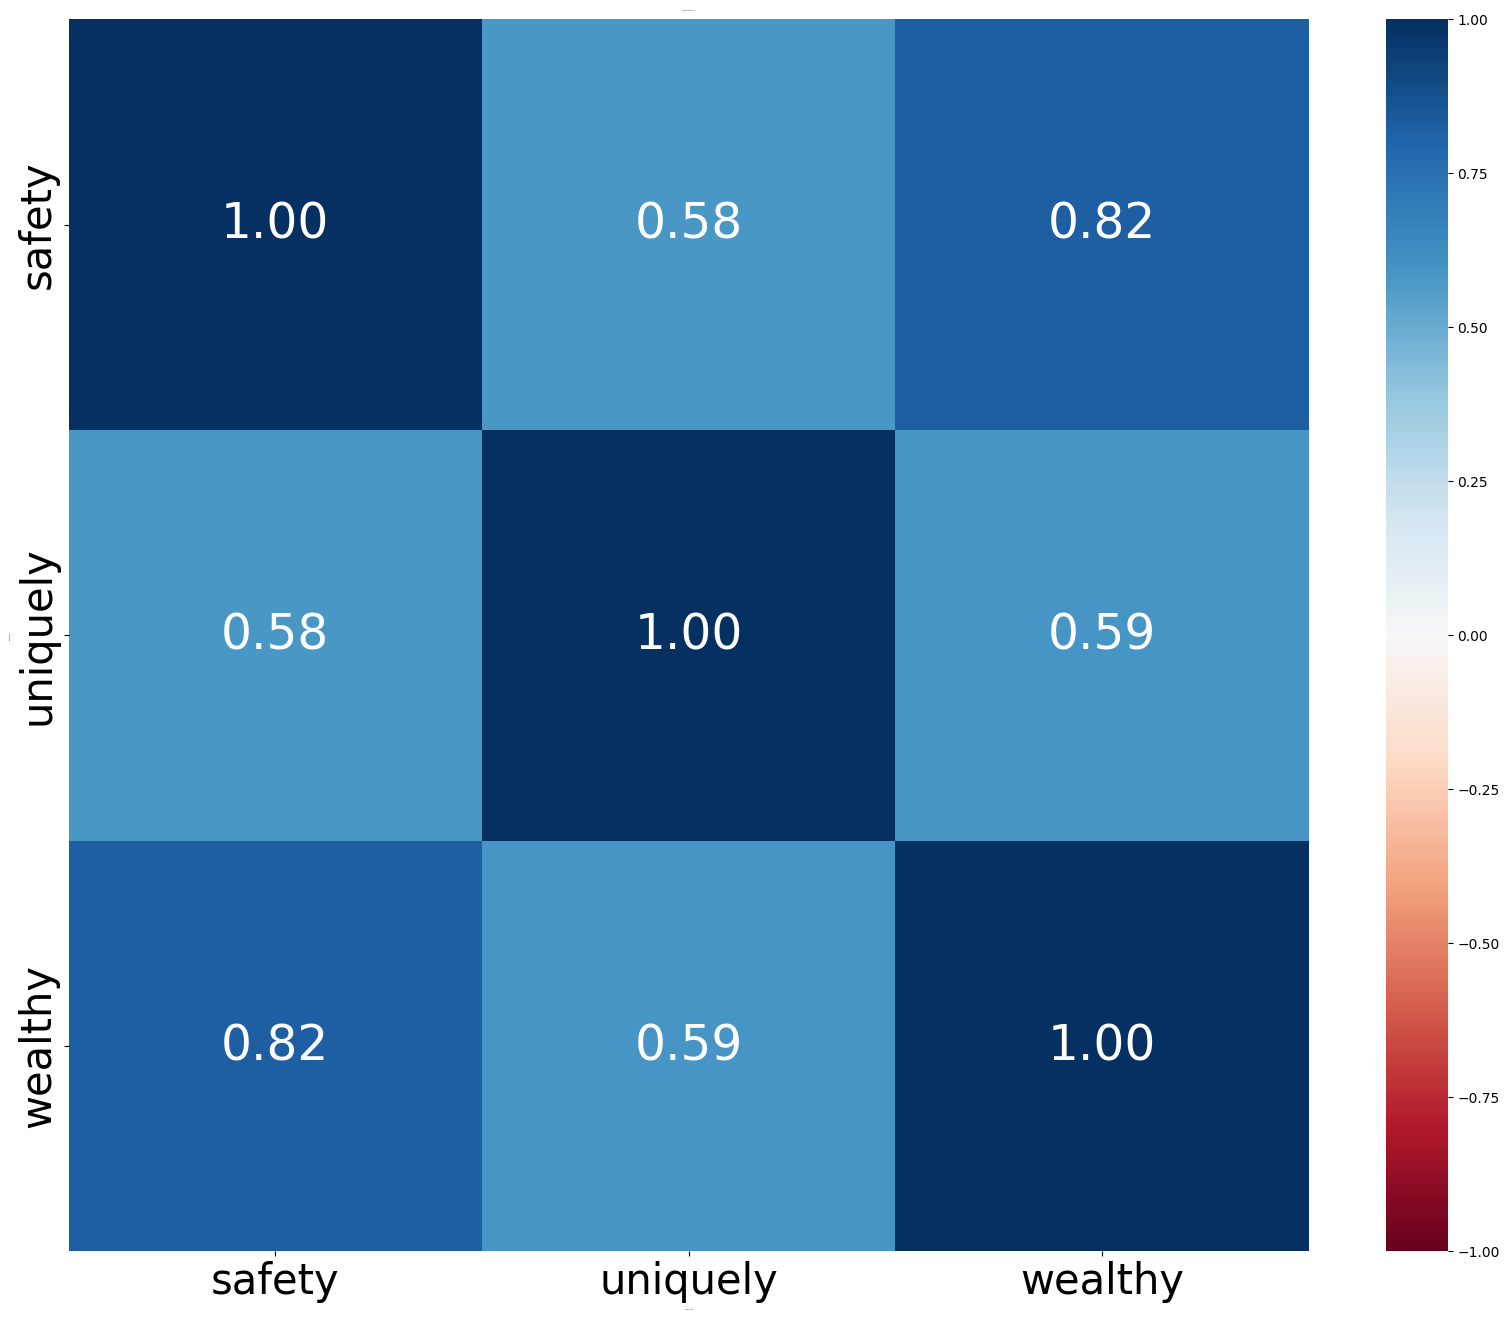

In [11]:
# confusion_matrix = pd.crosstab(data_df['annotations'], data_df['crimetype'], rownames=['annotations'], colnames=['crimetype'])

cmap=sns.diverging_palette(130, 700, s=100, as_cmap=True)
cmap="RdBu"

plt.figure(figsize=(20, 16))
sns_heatmap = sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap=cmap, center=0, vmin=-1, vmax=1, cbar=True, annot_kws={"size": 35})

# Customize the plot
sns_heatmap.set_title('Correlation Matrix', fontsize=0)
sns_heatmap.set_xlabel('Crime type', fontsize=0, rotation=0)
sns_heatmap.set_ylabel('Annotations', fontsize=0)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# Display the plot
plt.show()

#### Number of images per city

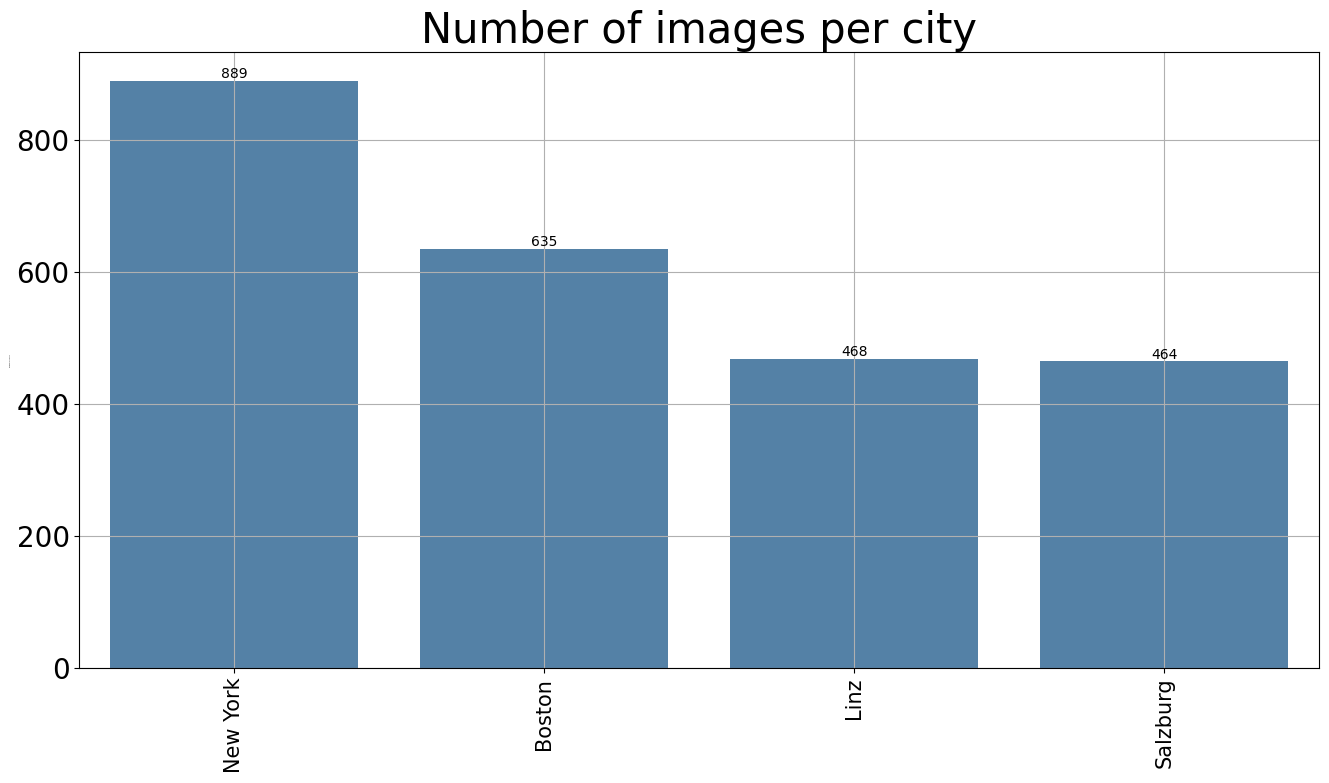

In [12]:
city_df = data_df["city"].value_counts().reset_index().copy()
city_df.rename(columns={"index": "city", "city": "unique_images"}, inplace=True)
fig, ax = plt.subplots(figsize=(16,8), nrows=1, ncols=1, sharex=False, sharey=False)

sns_fig = sns.barplot(
            data=city_df,
            x=city_df.columns[0],
            y=city_df.columns[1],
            ax=ax,
            color="steelblue",
            order=city_df.sort_values(city_df.columns[1], ascending=False)[city_df.columns[0]]
           )

sns_fig.set_title(f"Number of images per city", fontsize=30)
sns_fig.set_ylabel(f"Number of images", fontsize=0)
sns_fig.set_xlabel('', fontsize=20)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='x', rotation=90, labelsize=15)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='y', labelsize=20)

# add annotation
_ = sns_fig.bar_label(sns_fig.containers[0], fmt='%0.0f', fontsize=10,rotation=0)

# add a space on y for the annotations
#sns_fig.margins(x=0.1)
ax.grid(True)

# fig.savefig(f'{PROCESSED_IMAGES_PATH}/number_images_per_country.png')
plt.show()

#### Number of images per country

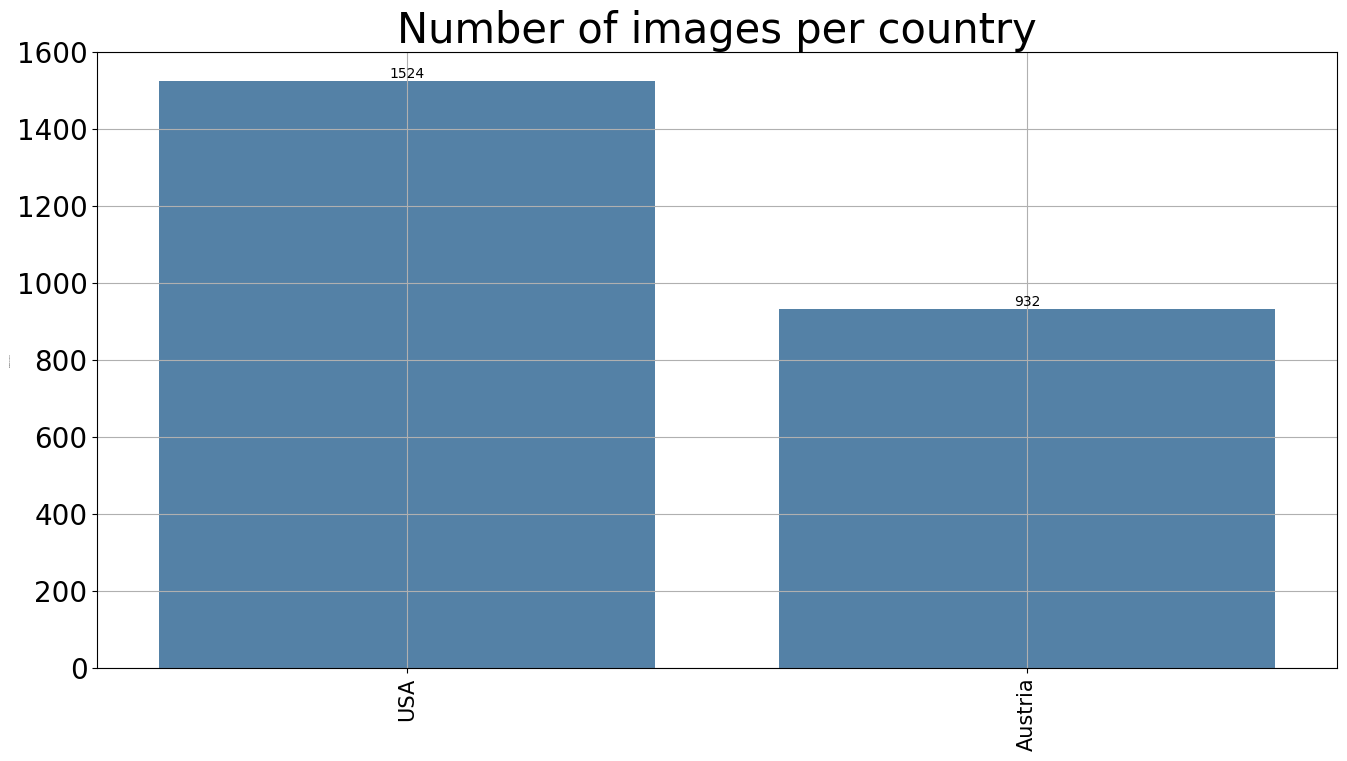

In [13]:
country_df = data_df["country"].value_counts().reset_index().copy()
country_df.rename(columns={"index": "country", "country": "unique_images"}, inplace=True)
fig, ax = plt.subplots(figsize=(16,8), nrows=1, ncols=1, sharex=False, sharey=False)

sns_fig = sns.barplot(
            data=country_df,
            x=country_df.columns[0],
            y=country_df.columns[1],
            ax=ax,
            color="steelblue",
            order=country_df.sort_values(country_df.columns[1], ascending=False)[country_df.columns[0]]
           )

sns_fig.set_title(f"Number of images per country", fontsize=30)
sns_fig.set_ylabel(f"Number of images", fontsize=0)
sns_fig.set_xlabel('', fontsize=20)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='x', rotation=90, labelsize=15)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='y', labelsize=20)

# add annotation
_ = sns_fig.bar_label(sns_fig.containers[0], fmt='%0.0f', fontsize=10,rotation=0)

# add a space on y for the annotations
#sns_fig.margins(x=0.1)
ax.grid(True)

# fig.savefig(f'{PROCESSED_IMAGES_PATH}/number_images_per_country.png')
plt.show()

#### Number of images per continent

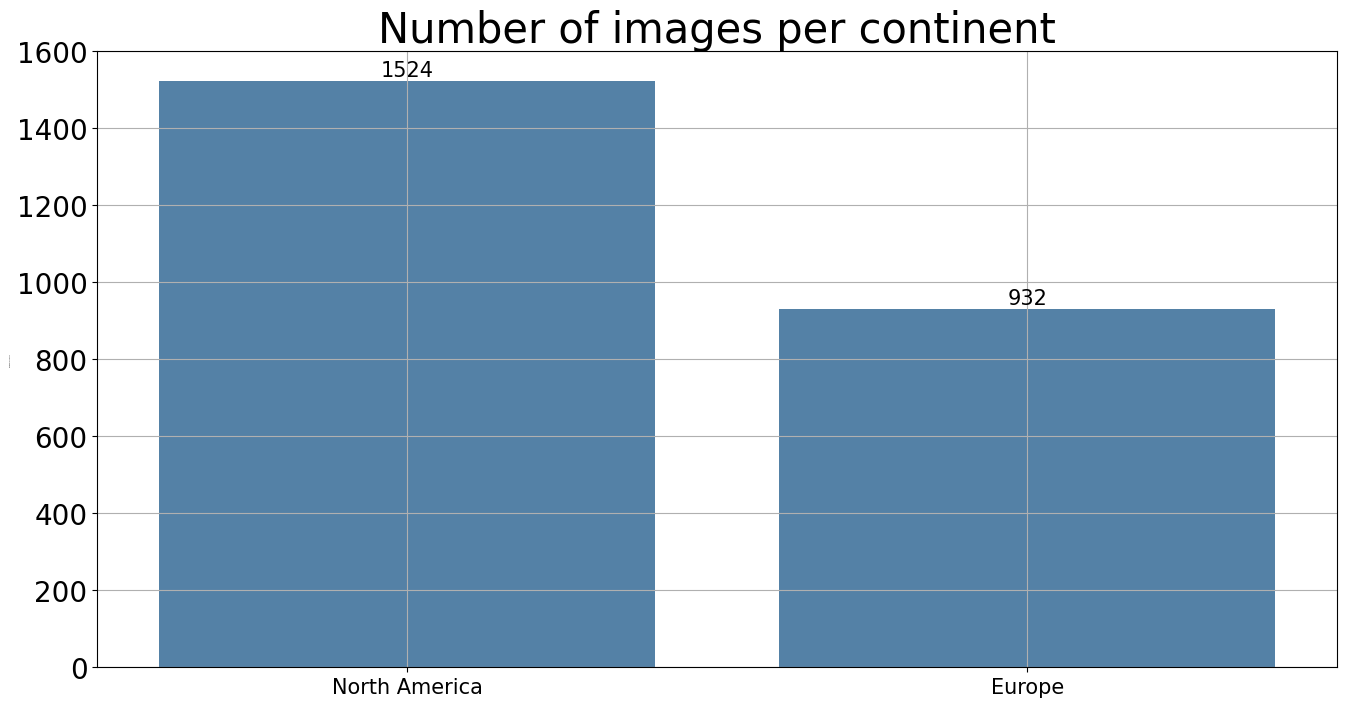

In [14]:
continent_df = data_df["continent"].value_counts().reset_index().copy()
continent_df.rename(columns={"index": "continent", "continent": "unique_images"}, inplace=True)
fig, ax = plt.subplots(figsize=(16,8), nrows=1, ncols=1, sharex=False, sharey=False)

sns_fig = sns.barplot(
            data=continent_df,
            x=continent_df.columns[0],
            y=continent_df.columns[1],
            ax=ax,
            color="steelblue",
            order=continent_df.sort_values(continent_df.columns[1], ascending=False)[continent_df.columns[0]]
           )

sns_fig.set_title(f"Number of images per continent", fontsize=30)
sns_fig.set_ylabel(f"Number of images", fontsize=0)
sns_fig.set_xlabel('', fontsize=20)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='x', rotation=0, labelsize=15)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='y', labelsize=20)

# add annotation
_ = sns_fig.bar_label(sns_fig.containers[0], fmt='%0.0f', fontsize=15,rotation=0)

# add a space on y for the annotations
#sns_fig.margins(x=0.1)
ax.grid(True)

# fig.savefig(f'{PROCESSED_IMAGES_PATH}/number_cities_per_continent.png')
plt.show()

#### Number of images evaluated

Total unique images: 2456


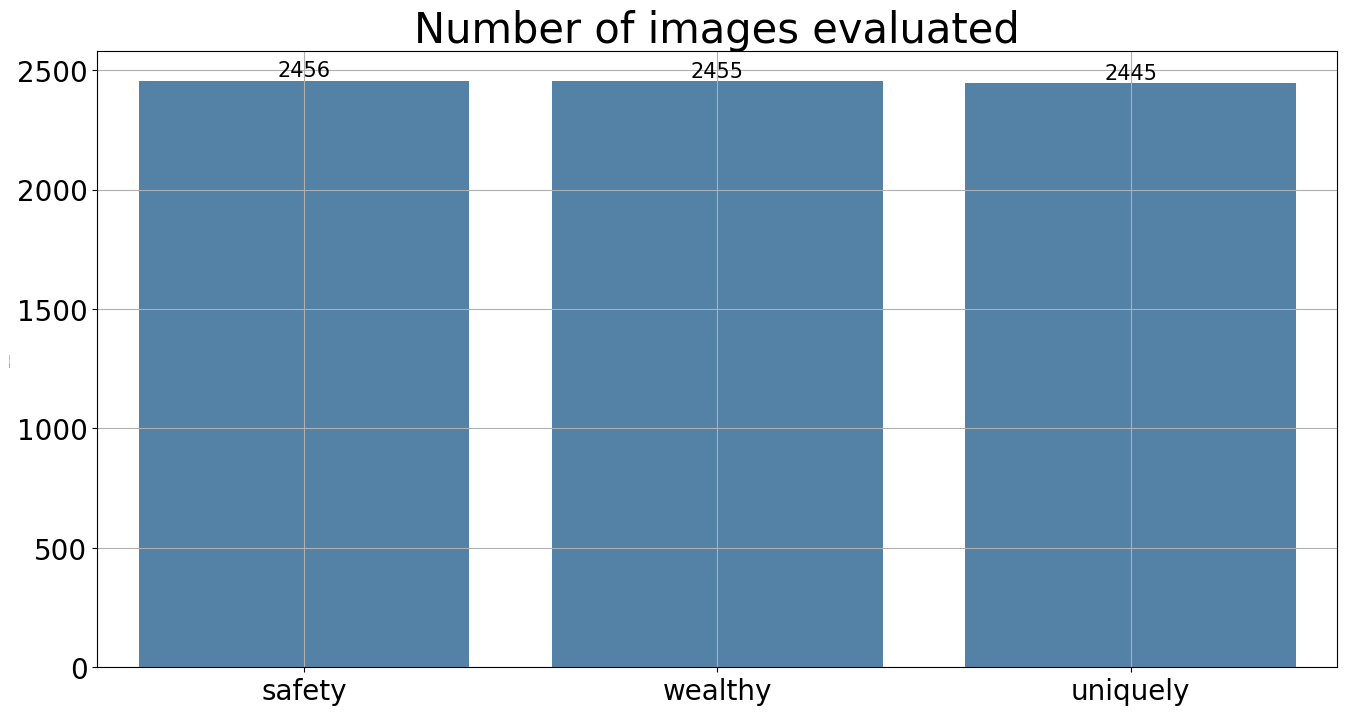

In [15]:
fig, ax = plt.subplots(figsize=(16,8), nrows=1, ncols=1, sharex=False, sharey=False)

zero_counts = data_df[metrics].ne(0.0).sum().reset_index()
print("Total unique images:", len(data_df))

sns_fig = sns.barplot(
            data=zero_counts,
            x=zero_counts.columns[0],
            y=zero_counts.columns[1],
            ax=ax,
            color="steelblue",
            order=zero_counts.sort_values(zero_counts.columns[1], ascending=False)[zero_counts.columns[0]]
           )

sns_fig.set_title(f"Number of images evaluated", fontsize=30)
sns_fig.set_ylabel(f"Number of images", fontsize=0)
sns_fig.set_xlabel('', fontsize=20)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='x', rotation=0, labelsize=20)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='y', labelsize=20)

# add annotation
_ = sns_fig.bar_label(sns_fig.containers[0], fmt='%0.0f', fontsize=15,rotation=0)

# add a space on y for the annotations
#sns_fig.margins(x=0.1)
ax.grid(True)

# fig.savefig(f'{PROCESSED_IMAGES_PATH}/number_of_images_evaluated_per_category.png')
plt.show()

Total unique images: 2456


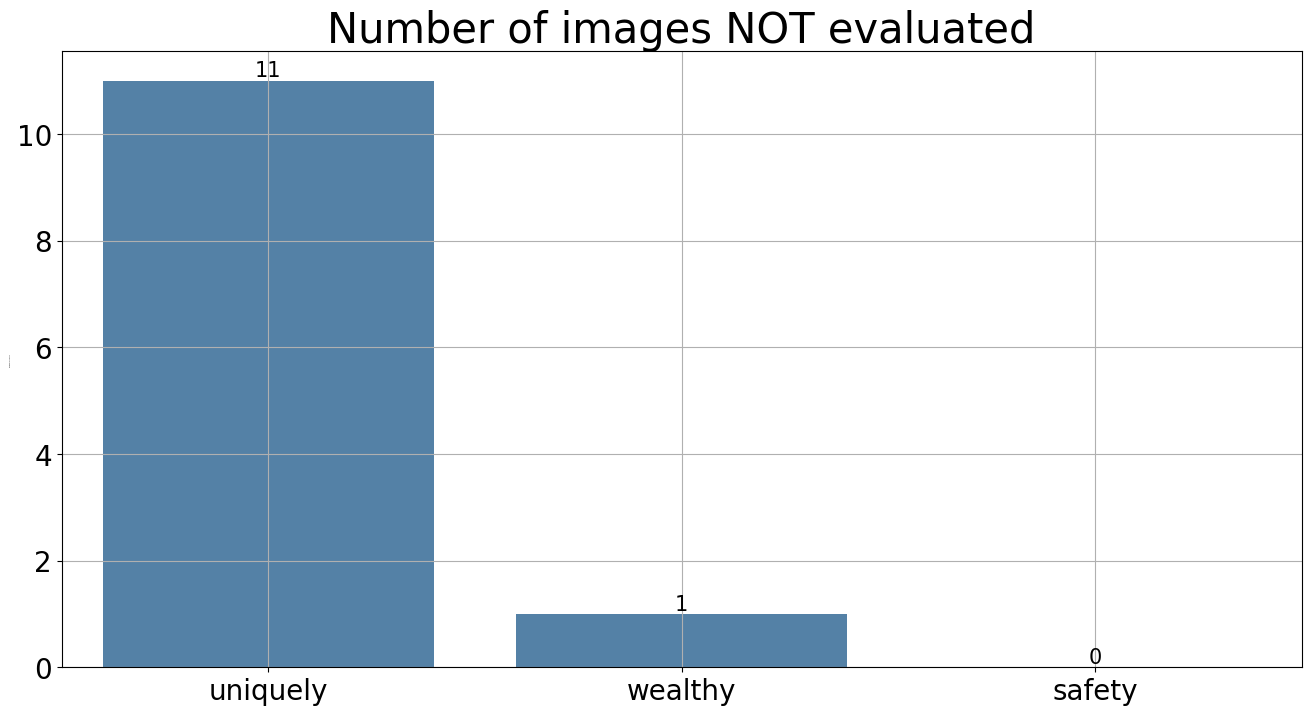

In [16]:
fig, ax = plt.subplots(figsize=(16,8), nrows=1, ncols=1, sharex=False, sharey=False)

zero_counts = data_df[metrics].eq(0.0).sum().reset_index()
print("Total unique images:", len(data_df))

sns_fig = sns.barplot(
            data=zero_counts,
            x=zero_counts.columns[0],
            y=zero_counts.columns[1],
            ax=ax,
            color="steelblue",
            order=zero_counts.sort_values(zero_counts.columns[1], ascending=False)[zero_counts.columns[0]]
           )

sns_fig.set_title(f"Number of images NOT evaluated", fontsize=30)
sns_fig.set_ylabel(f"Number of images", fontsize=0)
sns_fig.set_xlabel('', fontsize=20)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='x', rotation=0, labelsize=20)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='y', labelsize=20)

# add annotation
_ = sns_fig.bar_label(sns_fig.containers[0], fmt='%0.0f', fontsize=15,rotation=0)

# add a space on y for the annotations
#sns_fig.margins(x=0.1)
ax.grid(True)

# fig.savefig(f'{PROCESSED_IMAGES_PATH}/number_of_images_evaluated_per_category.png')
plt.show()

#### Number of images per city and category

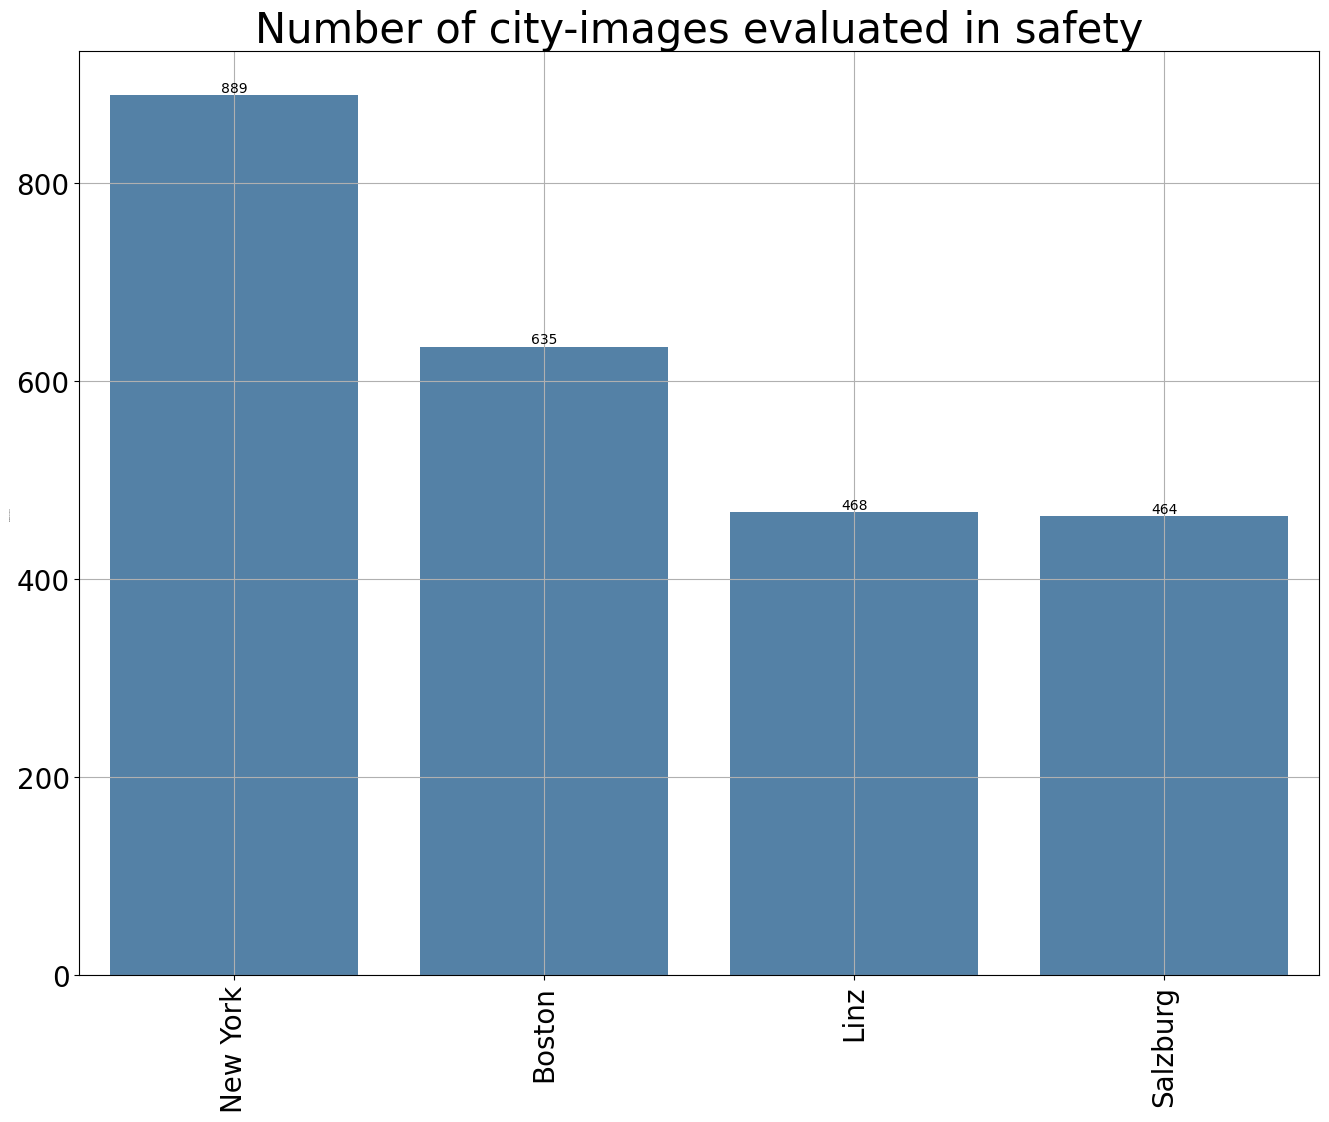

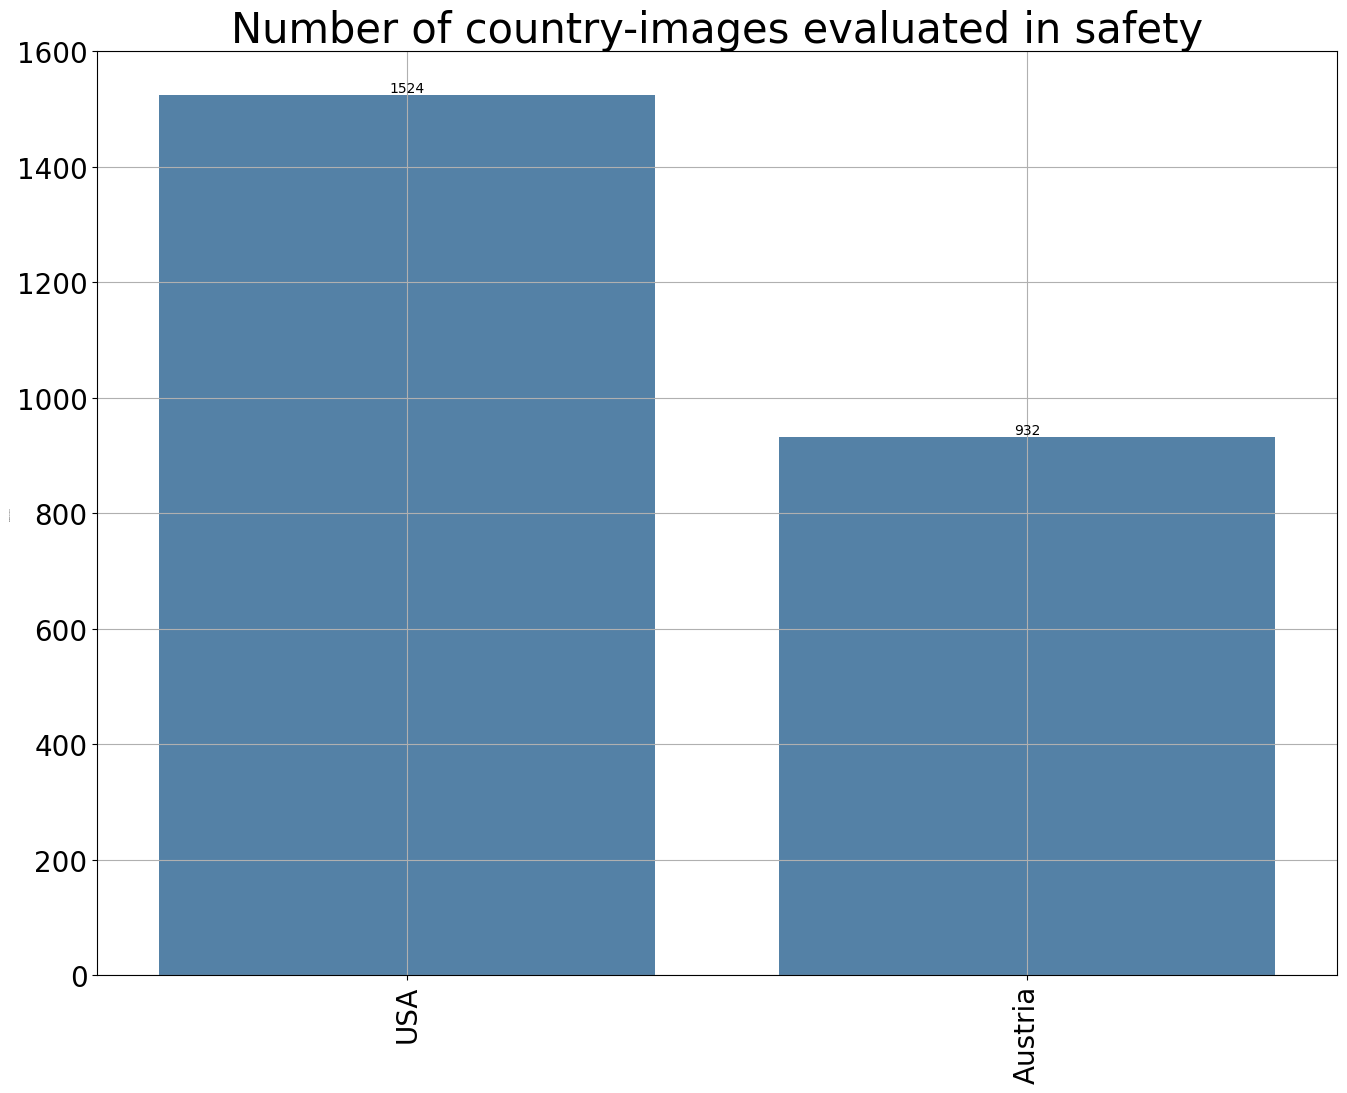

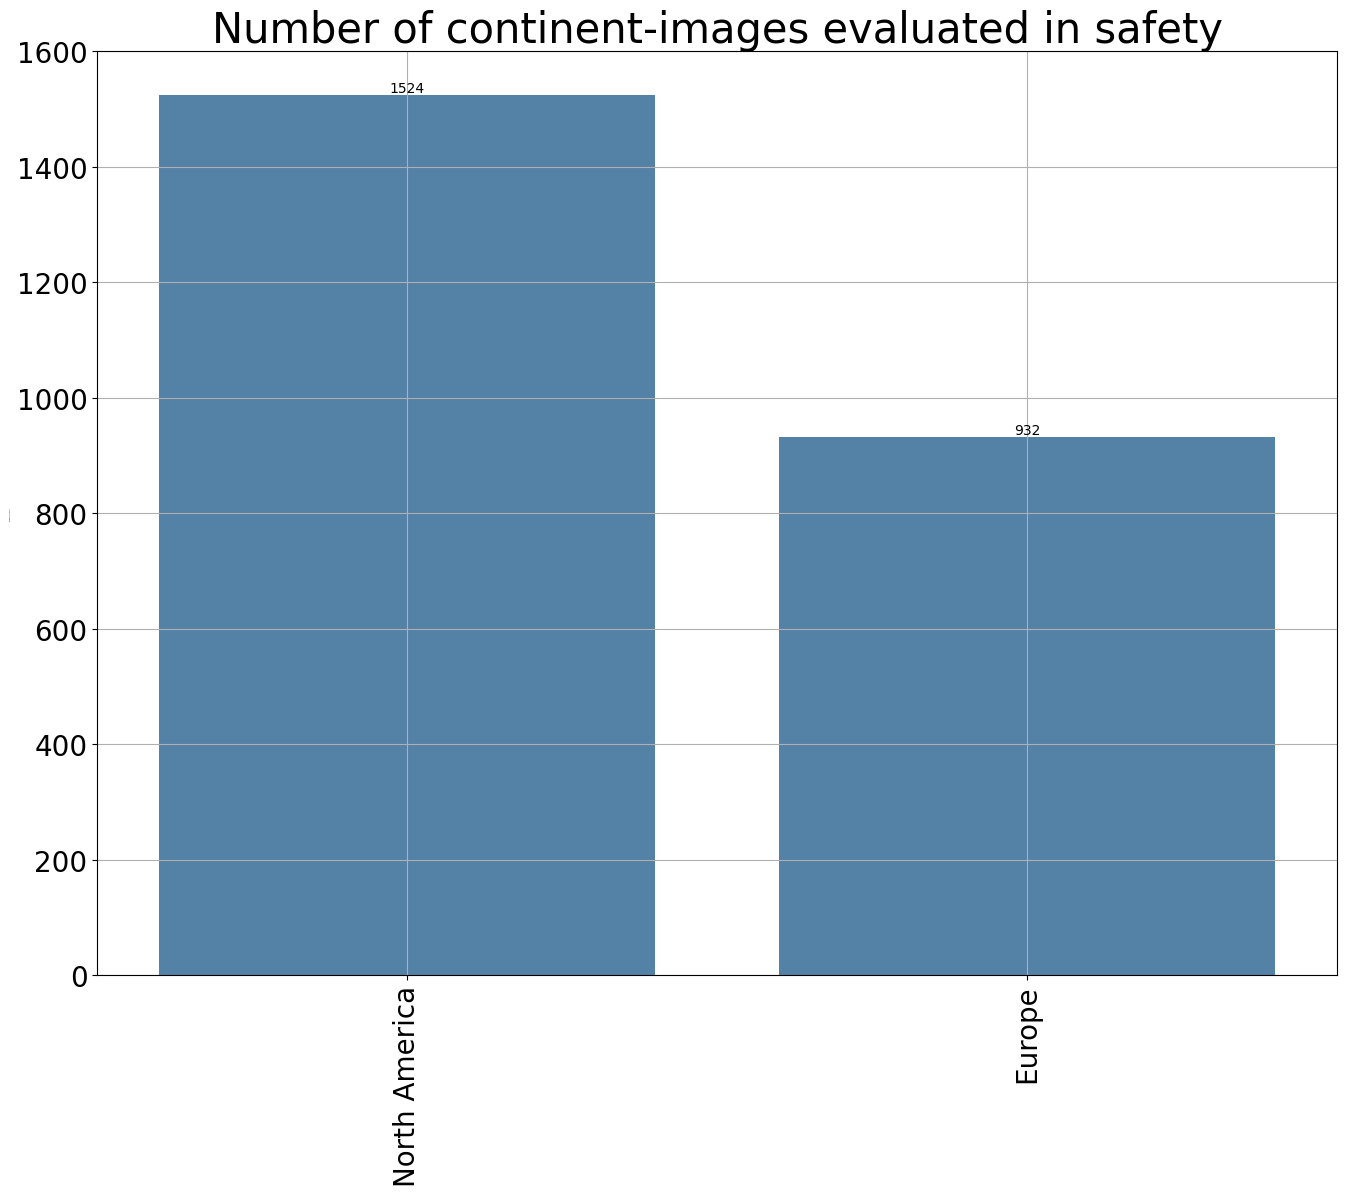

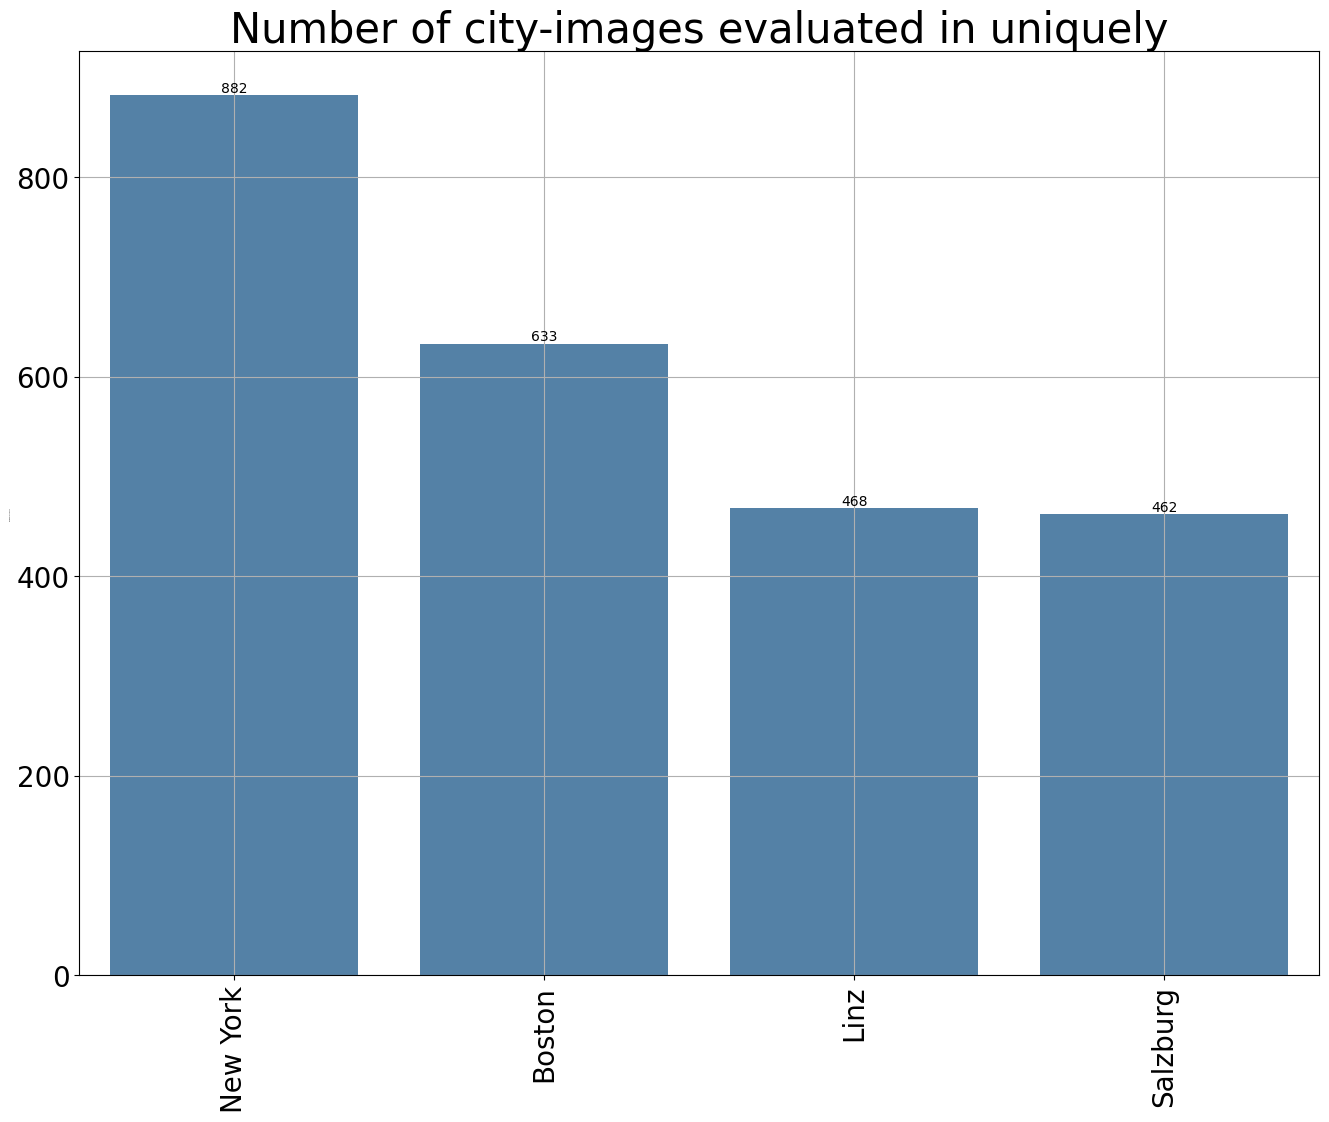

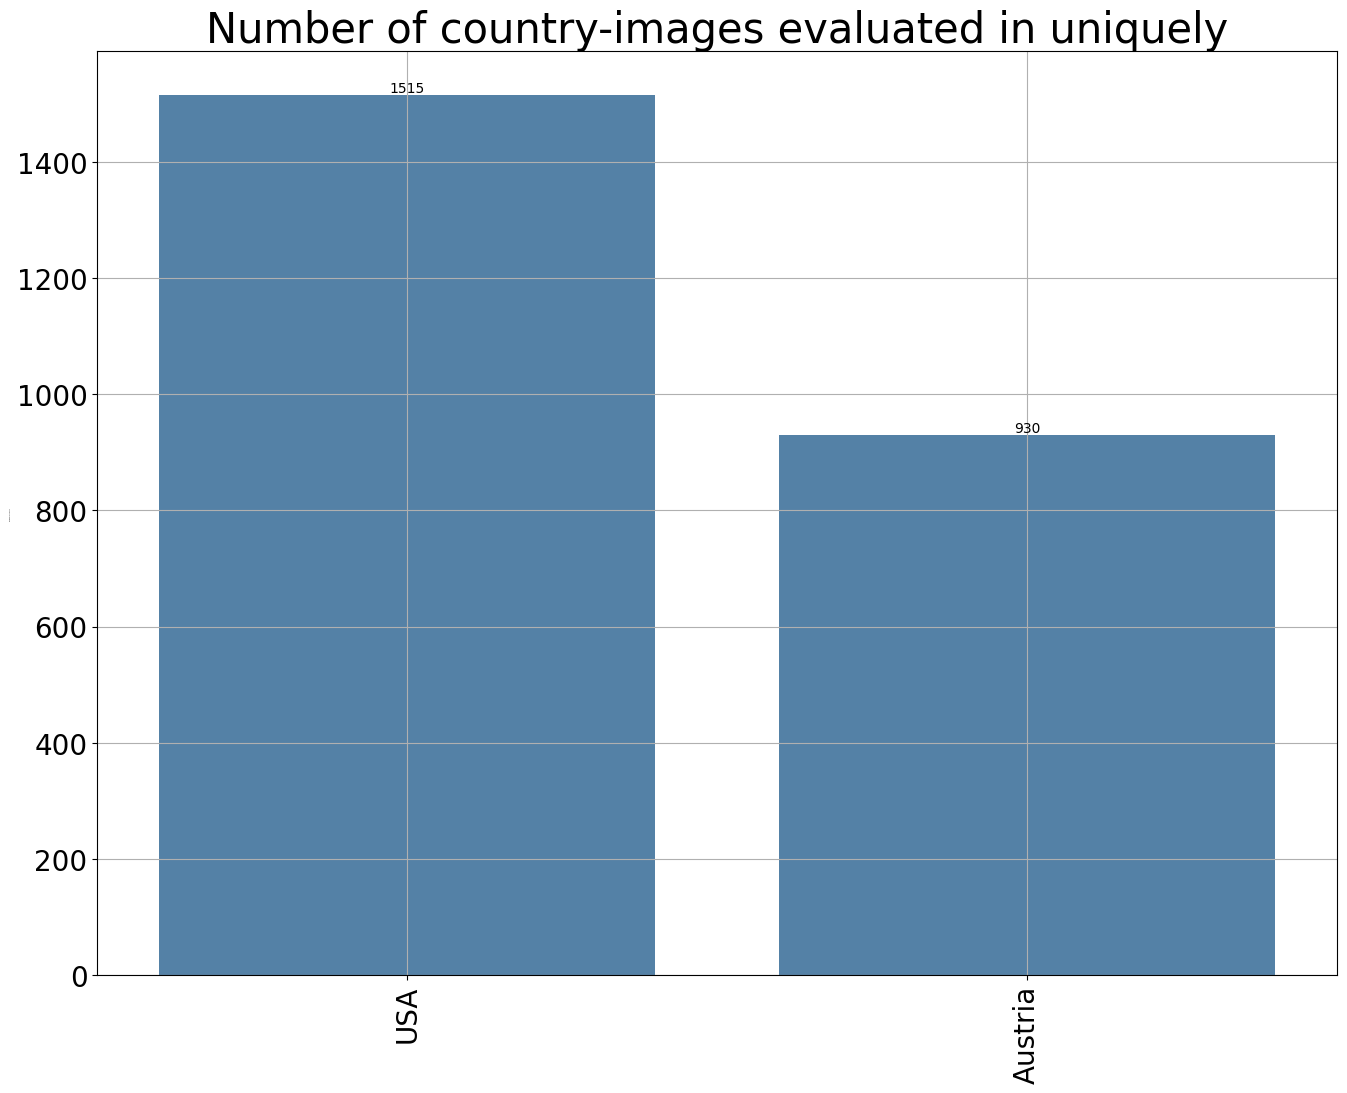

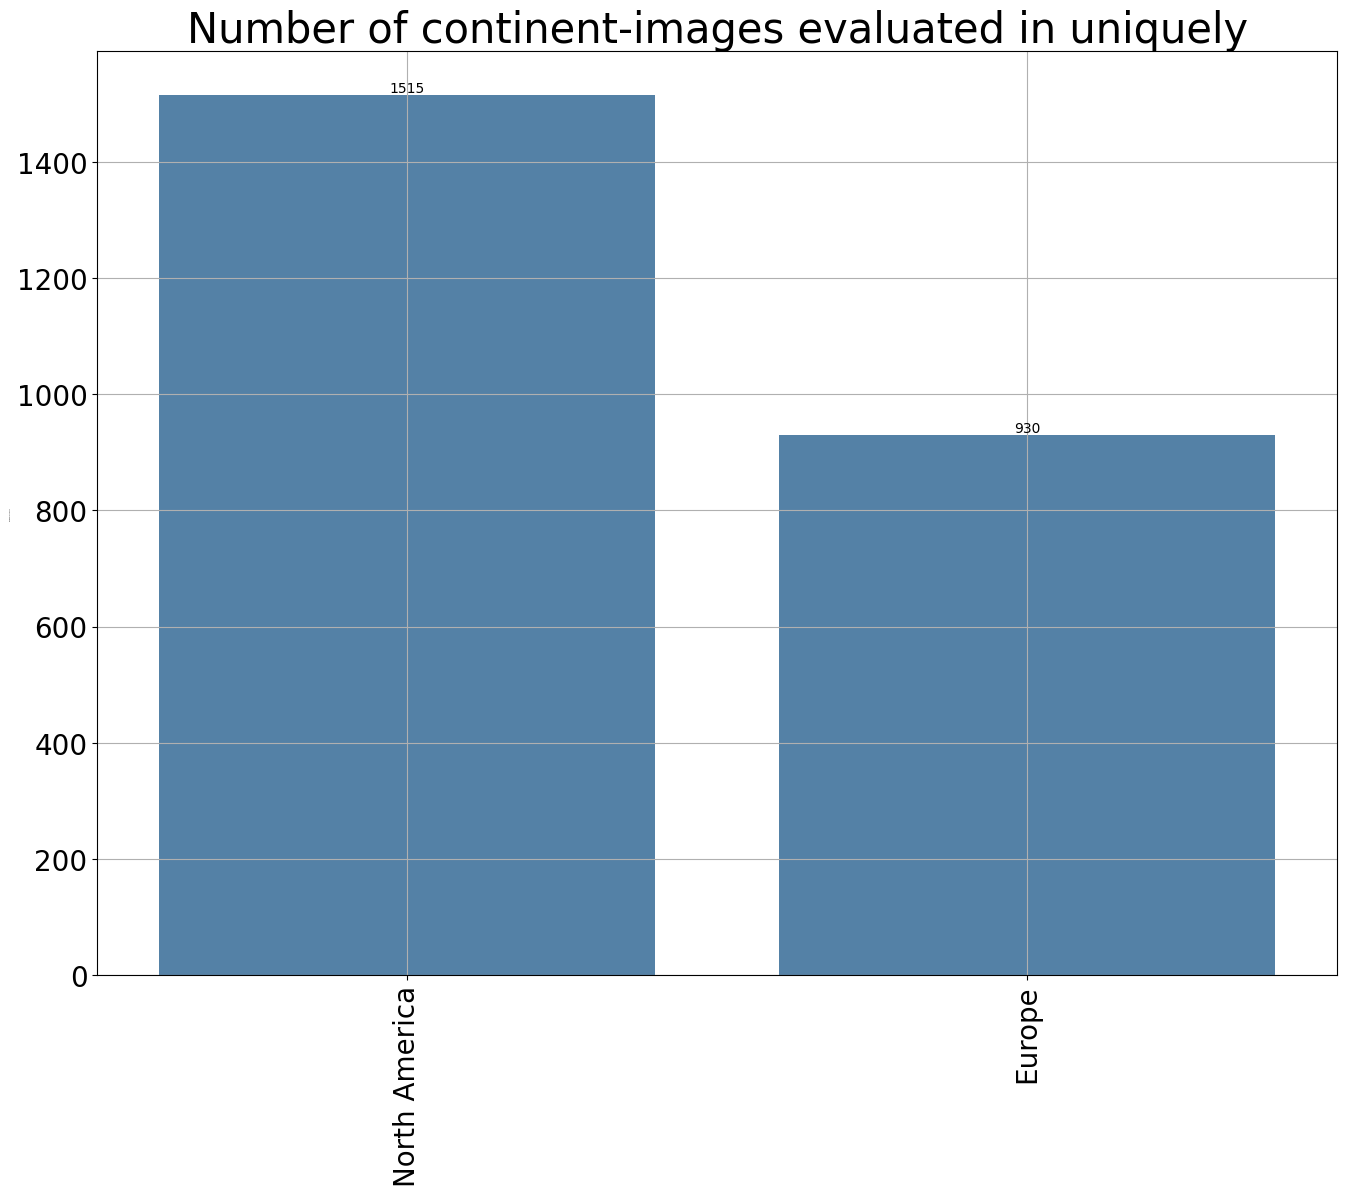

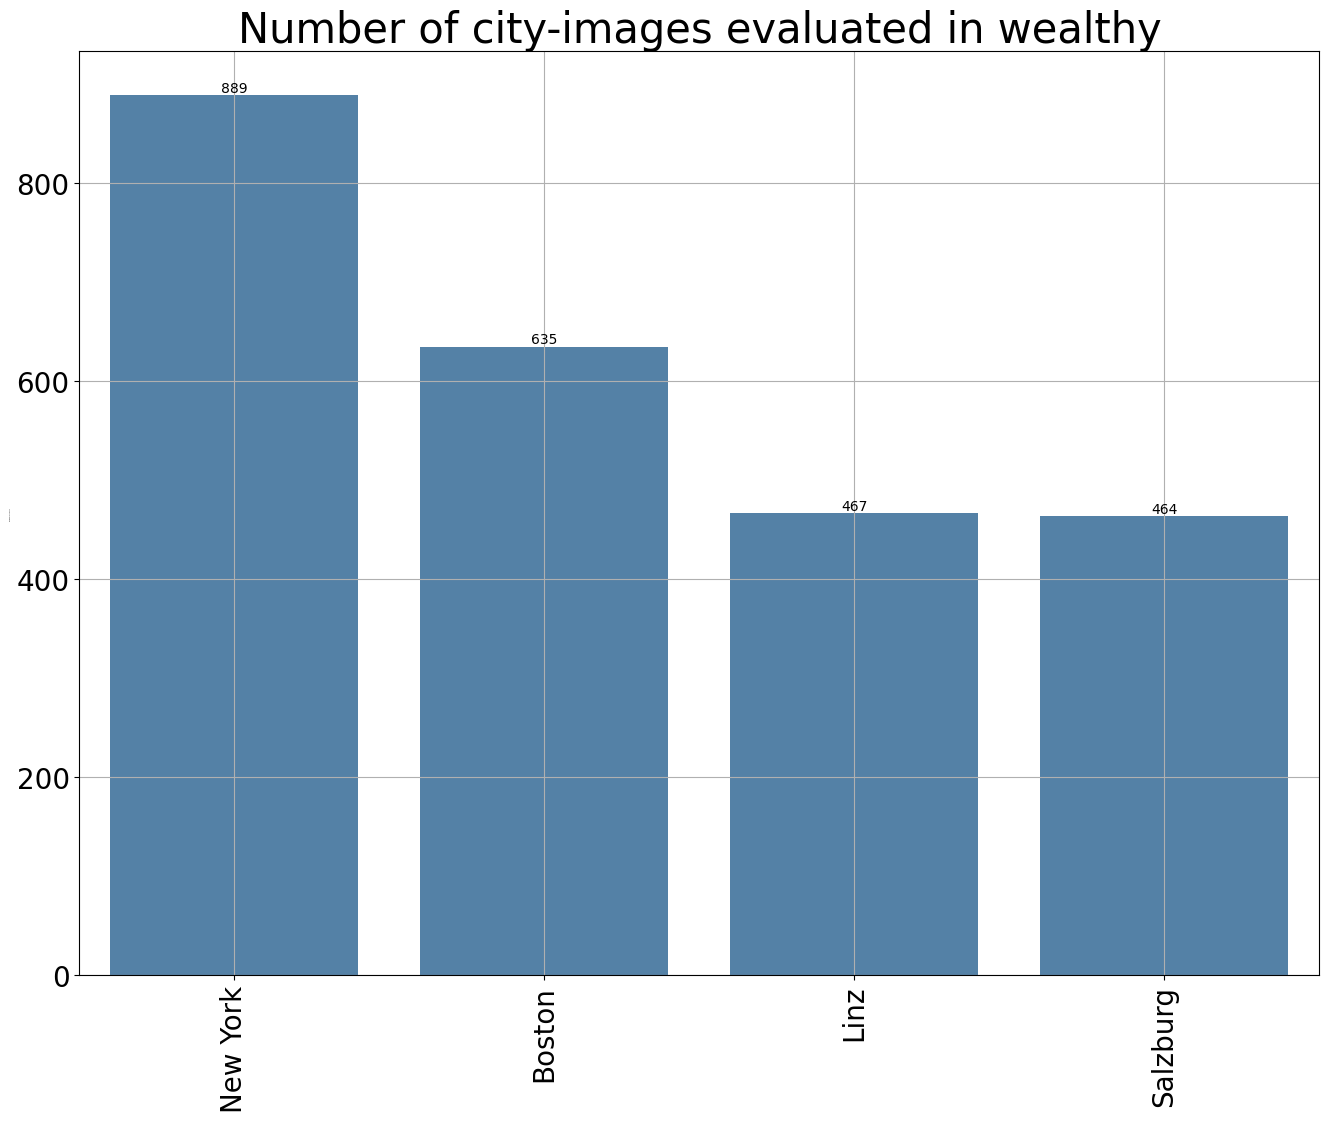

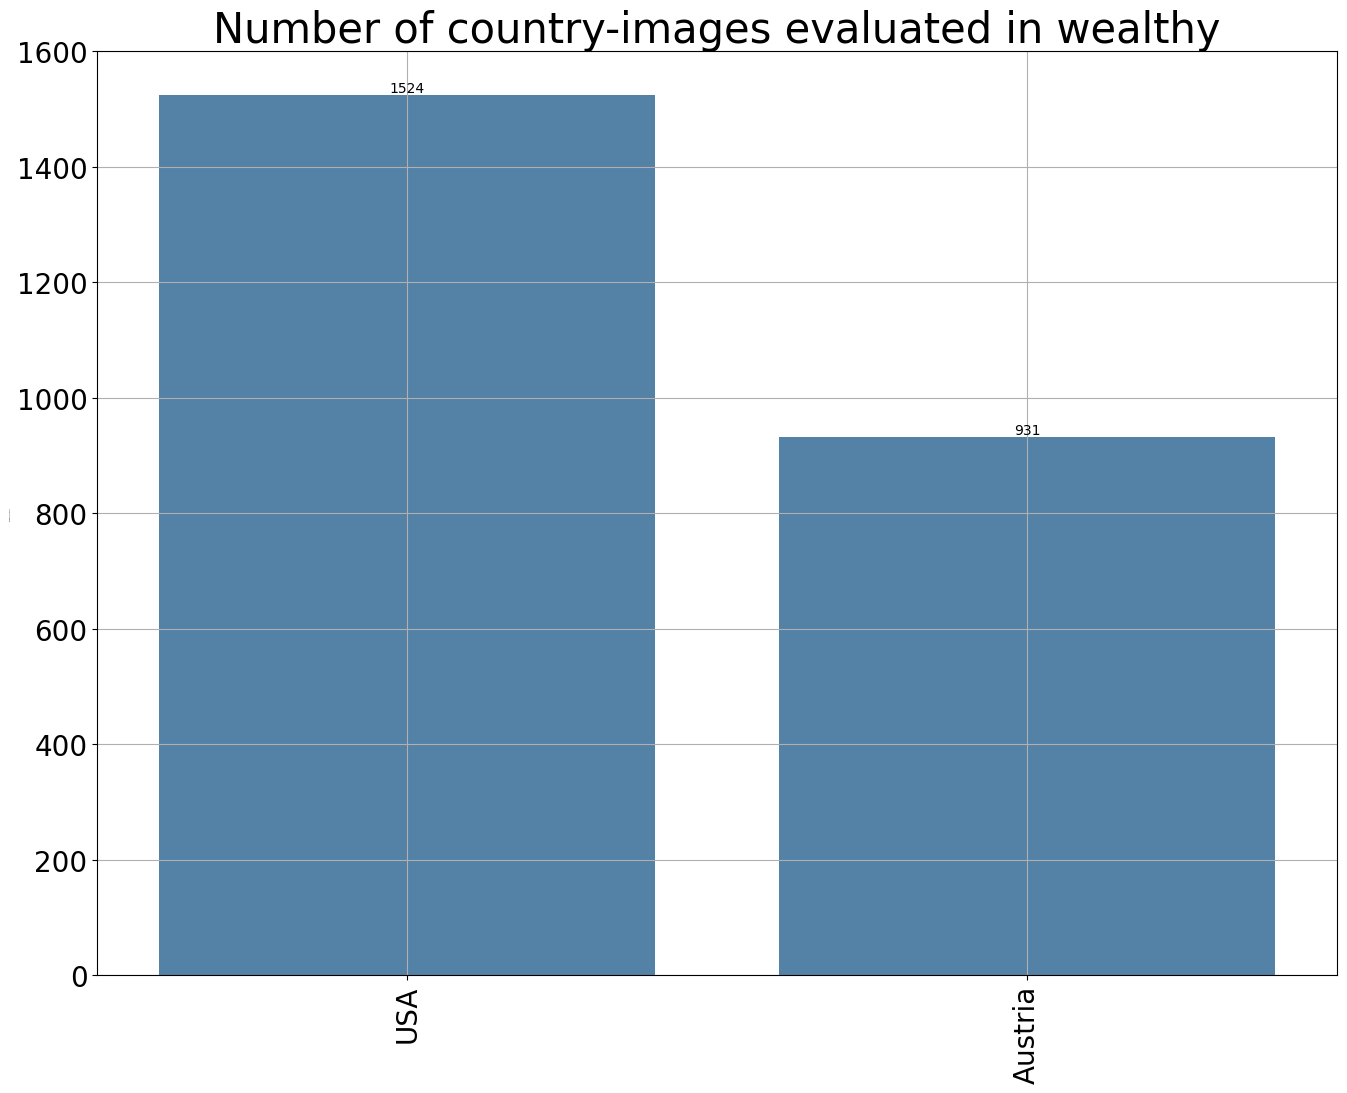

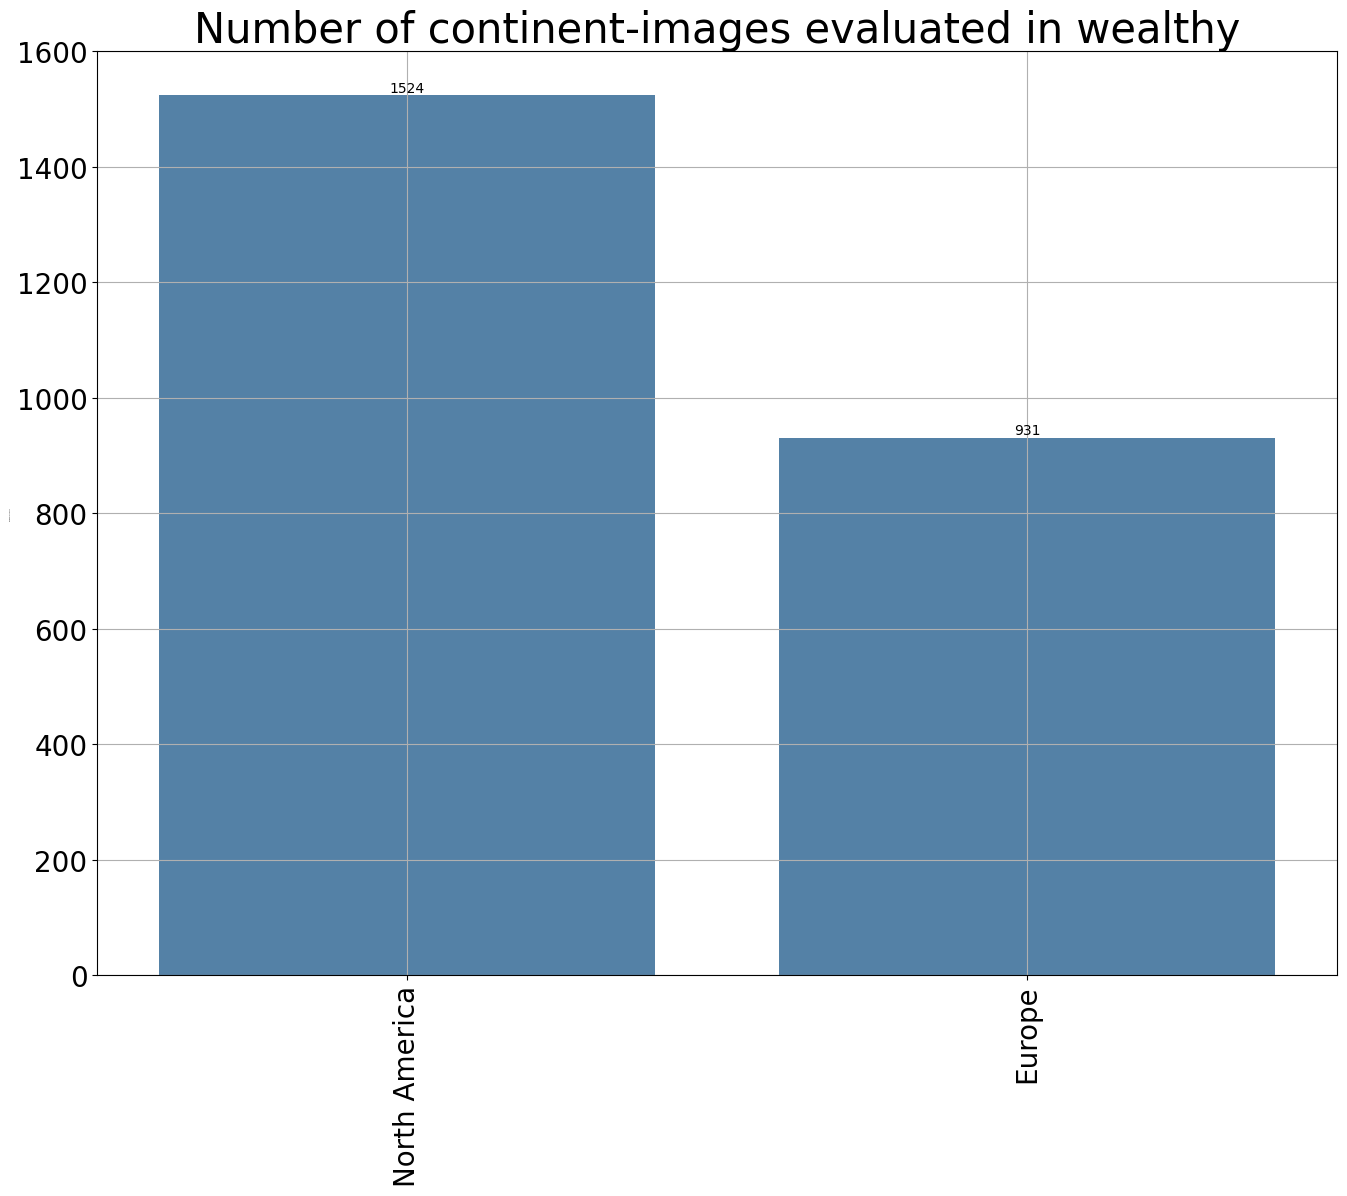

In [17]:
for metric in metrics:
    # verifyDir(f"{PROCESSED_IMAGES_PATH}{metric}/")
    df_ = data_df[data_df[metric]!=0.0].copy()
    for geo_level in ["city", "country", "continent"]:
        geo_df = df_[[metric, geo_level, "image_id"]].drop_duplicates().value_counts().reset_index()
        geo_df = geo_df[[geo_level]].value_counts().reset_index()
        geo_df.rename(columns={0: "number_images"}, inplace=True)
        
        fig, ax = plt.subplots(figsize=(16,12), nrows=1, ncols=1, sharex=False, sharey=False)
        sns_fig = sns.barplot(
                data=geo_df,
                x=geo_df.columns[0],
                y=geo_df.columns[1],
                ax=ax,
                color="steelblue",
                order=geo_df.sort_values(geo_df.columns[1], ascending=False)[geo_df.columns[0]]
               )

        sns_fig.set_title(f"Number of {geo_level}-images evaluated in {metric}", fontsize=30)
        sns_fig.set_ylabel(f"Number of images", fontsize=0)
        sns_fig.set_xlabel('', fontsize=20)

        # rotate the axis ticklabels
        _ = sns_fig.tick_params(axis='x', rotation=90, labelsize=20)

        # rotate the axis ticklabels
        _ = sns_fig.tick_params(axis='y', labelsize=20)

        # add annotation
        _ = sns_fig.bar_label(sns_fig.containers[0], fmt='%0.0f', fontsize=10,rotation=0)

        # add a space on y for the annotations
        #sns_fig.margins(x=0.1)
        ax.grid(True)

        # fig.savefig(f'{PROCESSED_IMAGES_PATH}/{metric}/number_images_evaluated_per_{geo_level}.png')
        plt.show()  

### Score histogram per category

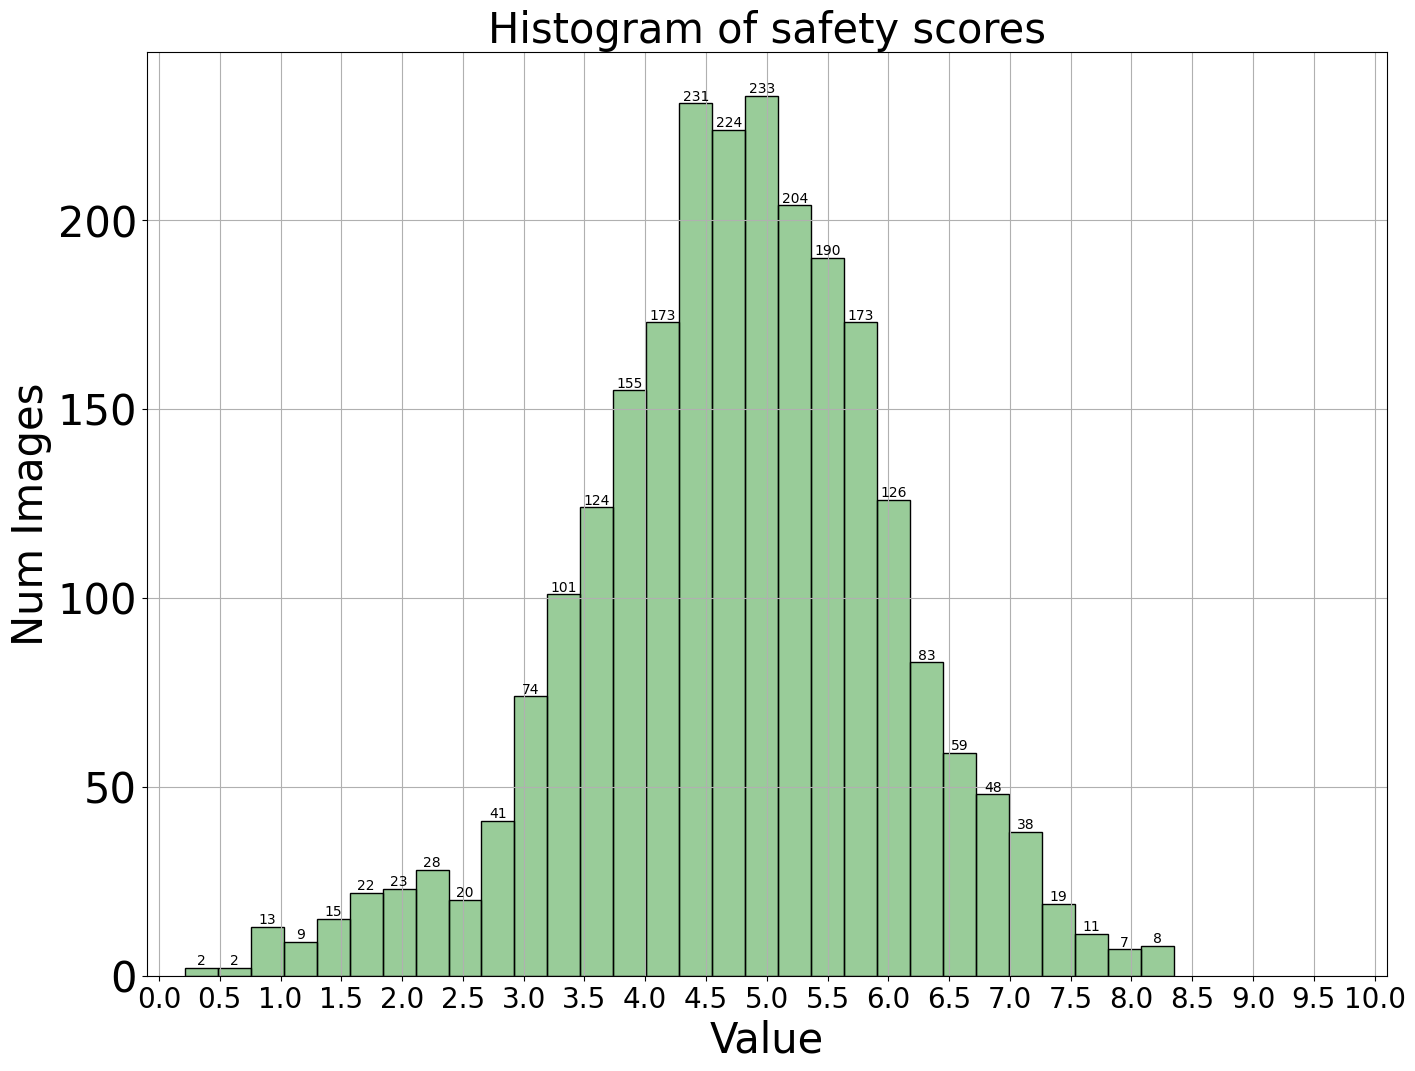

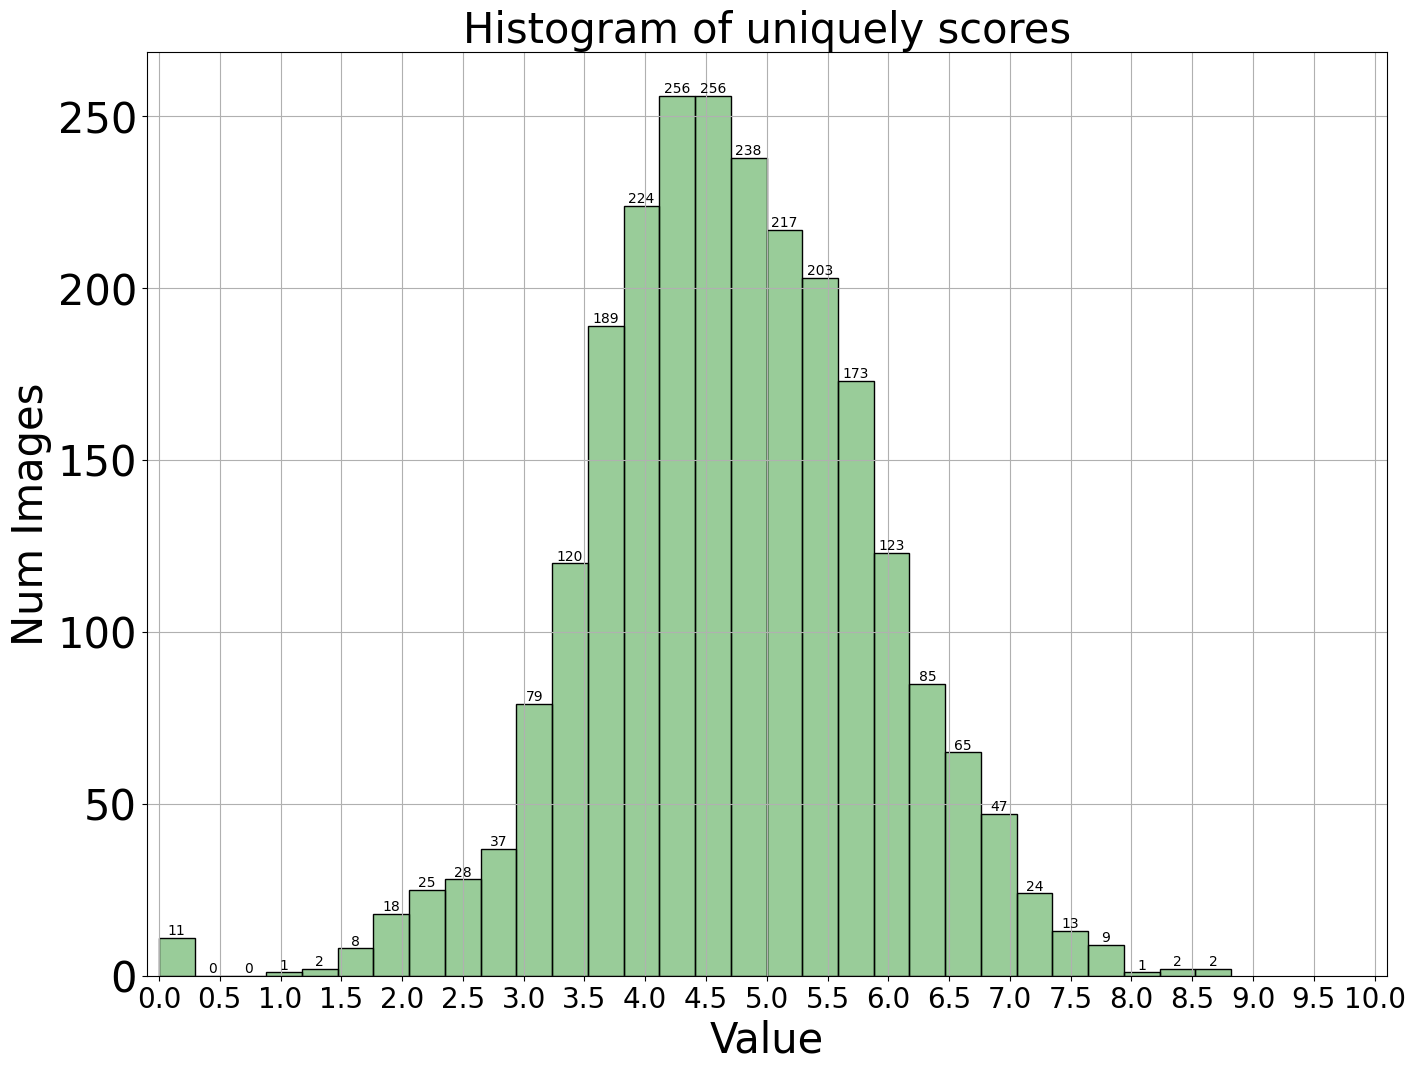

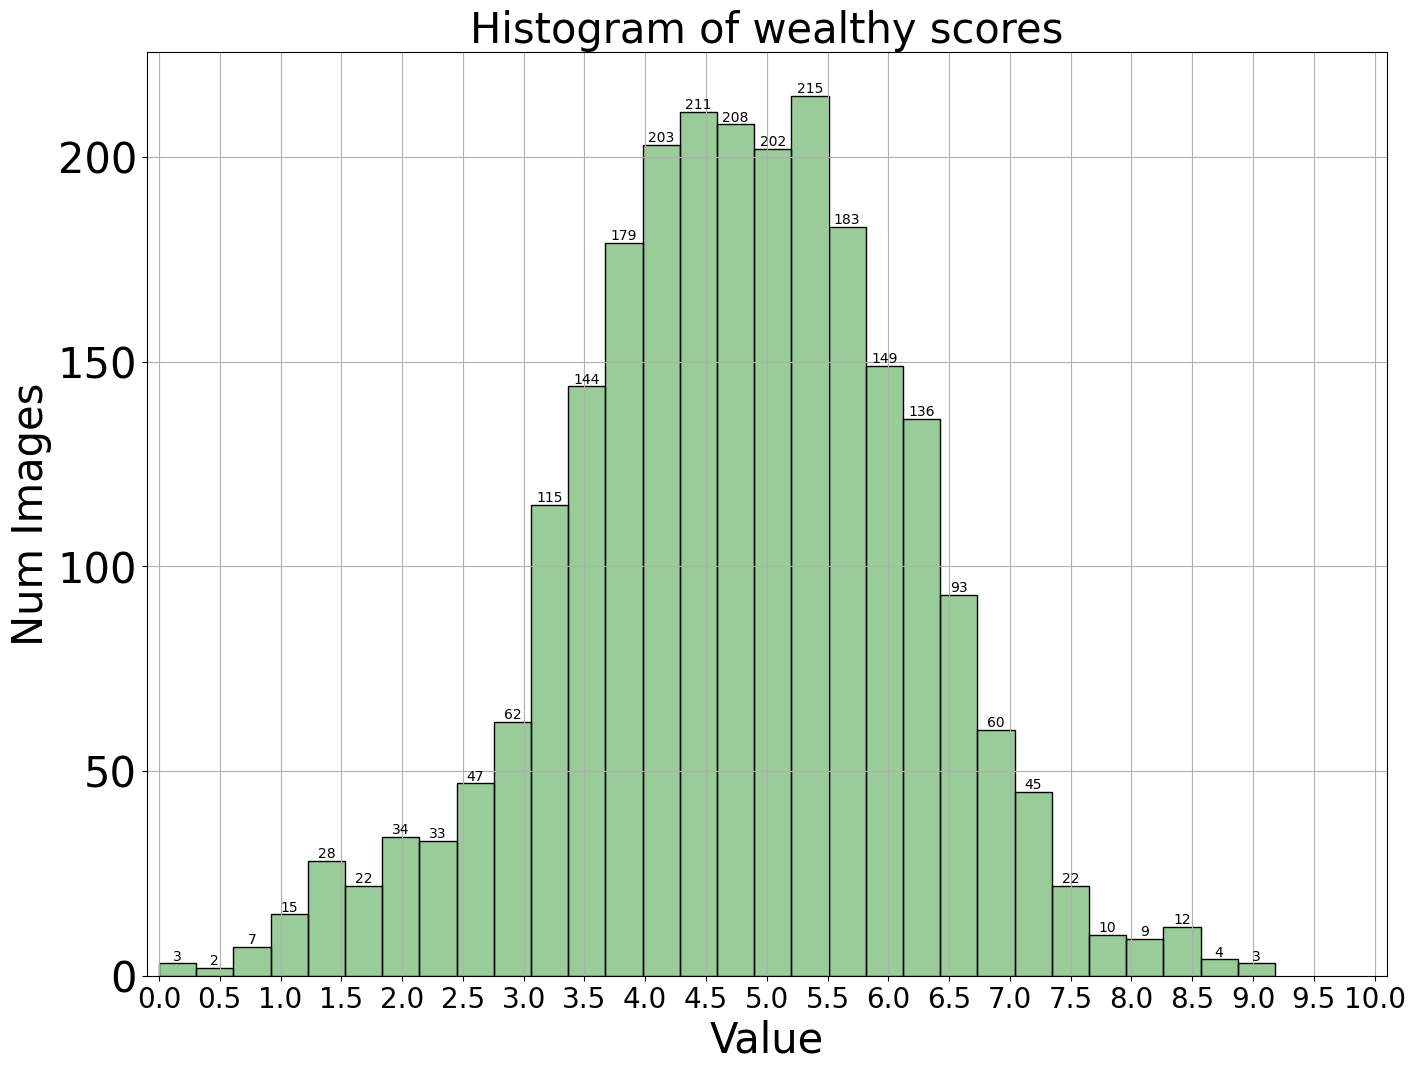

In [18]:
for metric in metrics:
    # verifyDir(f"{IMAGES_PATH}{metric}/")
    
    fig, ax = plt.subplots(figsize=(16,12), nrows=1, ncols=1, sharex=False, sharey=False)

    scores = data_df[metric].values

    sns_fig = sns.histplot(scores, 
                             bins=30, 
                             color='g', 
                             kde=False, 
                             label='City', 
                             ax=ax,
                             alpha=0.4)

    sns_fig.set_title(f"Histogram of {metric} scores", fontsize=30)
    sns_fig.set_ylabel('Num Images', fontsize=30)
    sns_fig.set_xlabel('Value', fontsize=30)

    # rotate the axis ticklabels
    _ = sns_fig.tick_params(axis='x', rotation=0, labelsize=20)

    # rotate the axis ticklabels
    _ = sns_fig.tick_params(axis='y', labelsize=30)

    # add annotation
    _ = sns_fig.bar_label(sns_fig.containers[0], fmt='%0.0f', fontsize=10,rotation=0)

    # add a space on y for the annotations
    #sns_fig.margins(x=0.1)
    ax.grid(True)

    # plt.xlim(-0.1, 10.1)
    # plt.xticks(np.arange(0.0, 10.1, 0.5))

    # ax.legend(fontsize=40)
    # a,b = ax.get_xlim()
    xticks = np.arange(0.0, 10.1, 0.5)  # Adjust the range and step as needed
    sns_fig.set_xticks(xticks)
    ax.set_xlim(-0.1, 10.1)

    # # Display the plot
    # plt.legend()

    # fig.savefig(f'{IMAGES_PATH}/{metric}/score_distribution.png')
    plt.show()

### Score histogram per category and cities

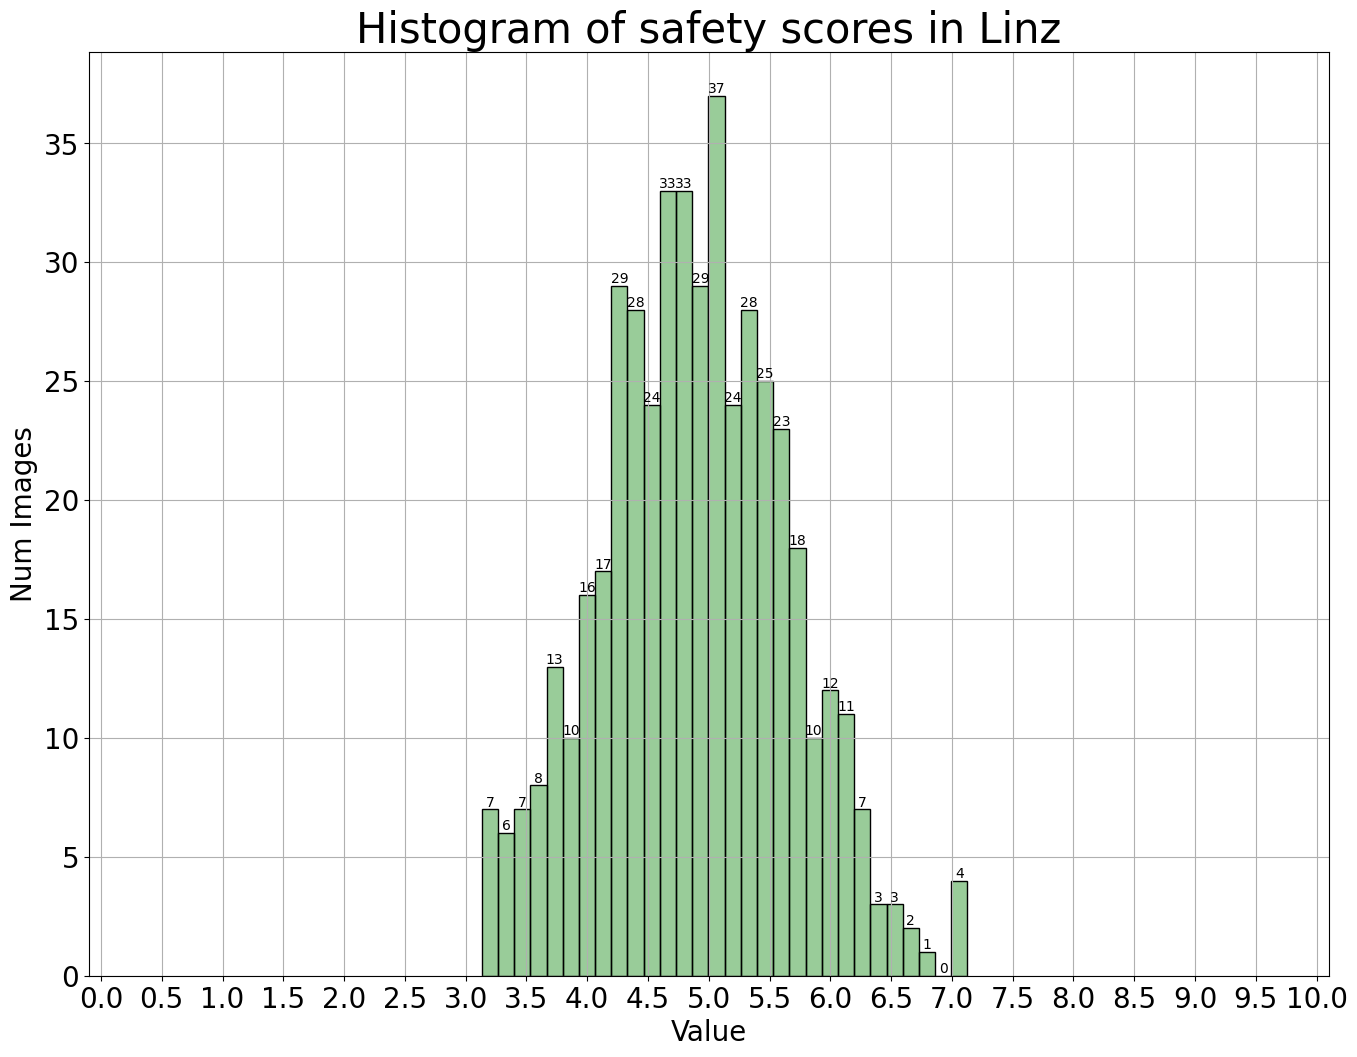

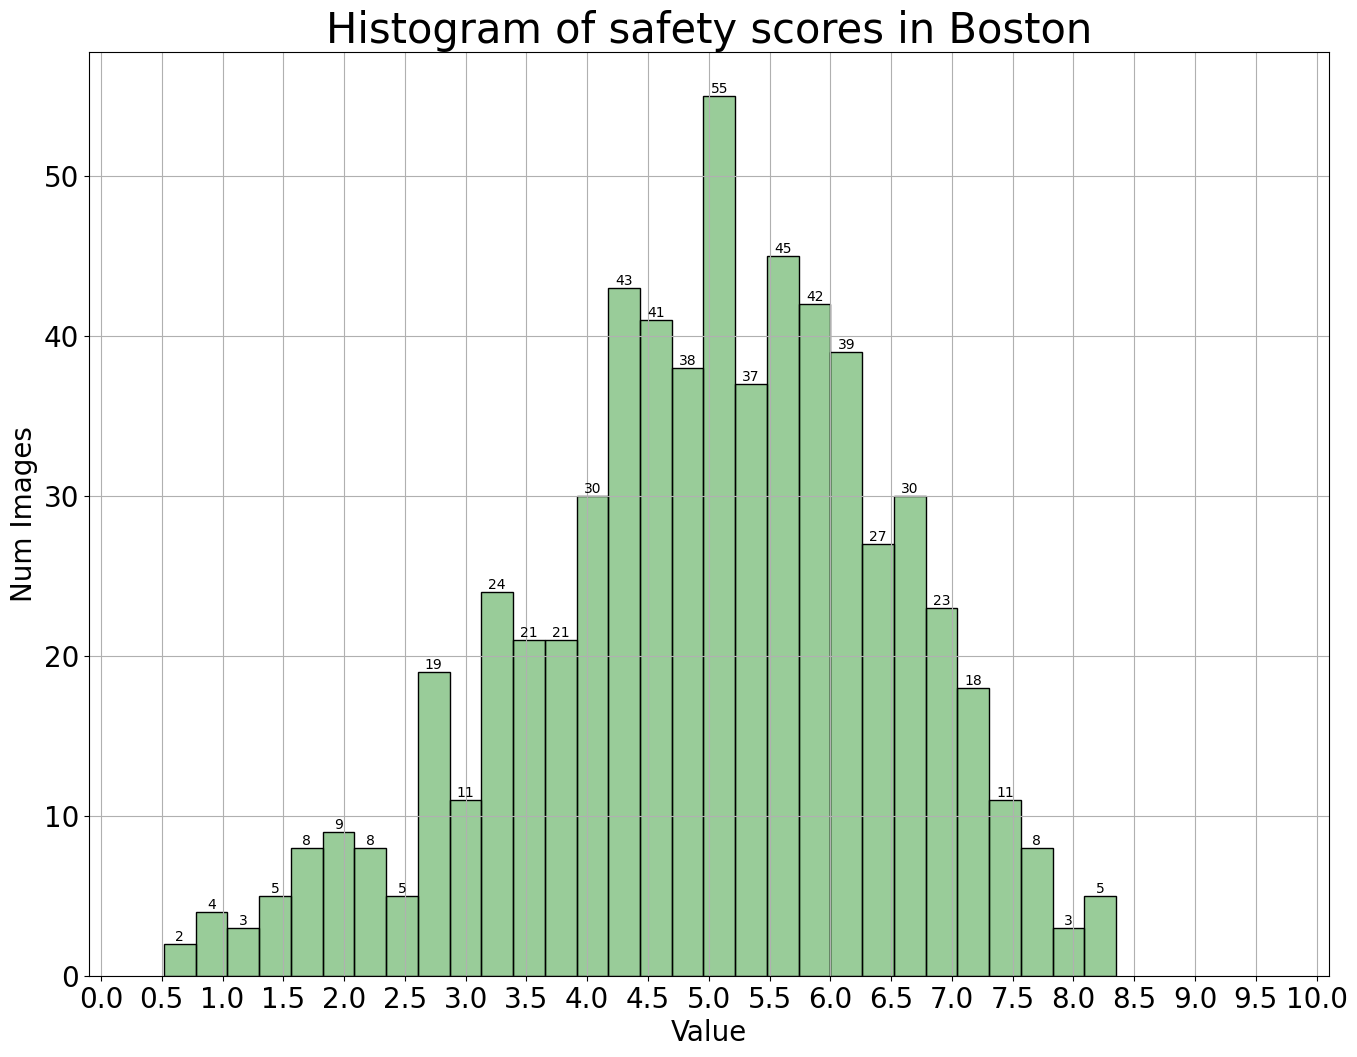

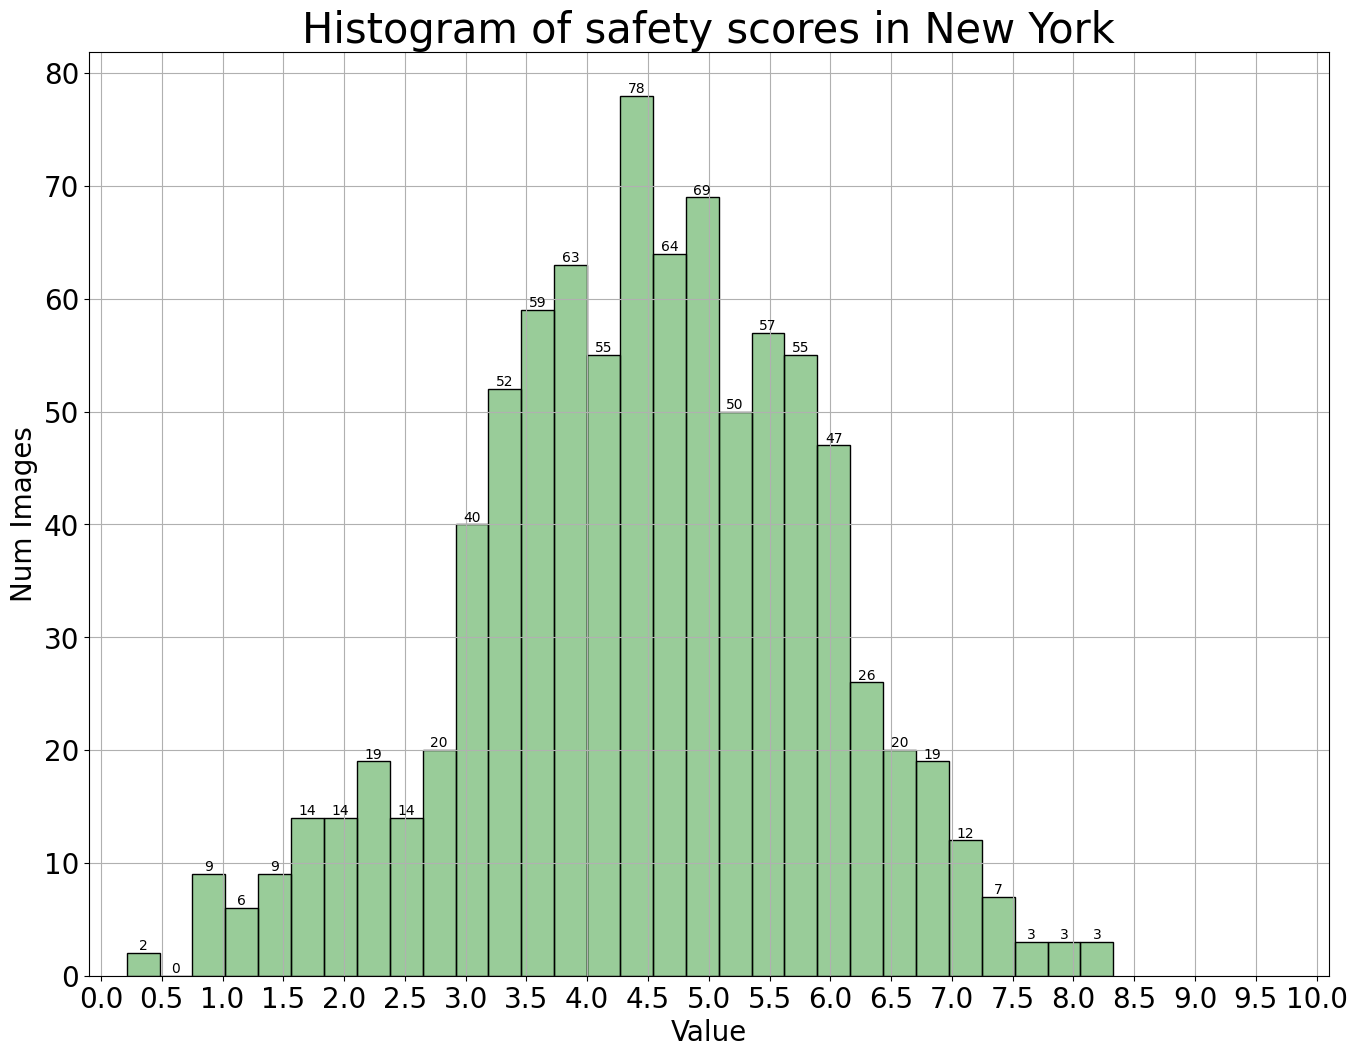

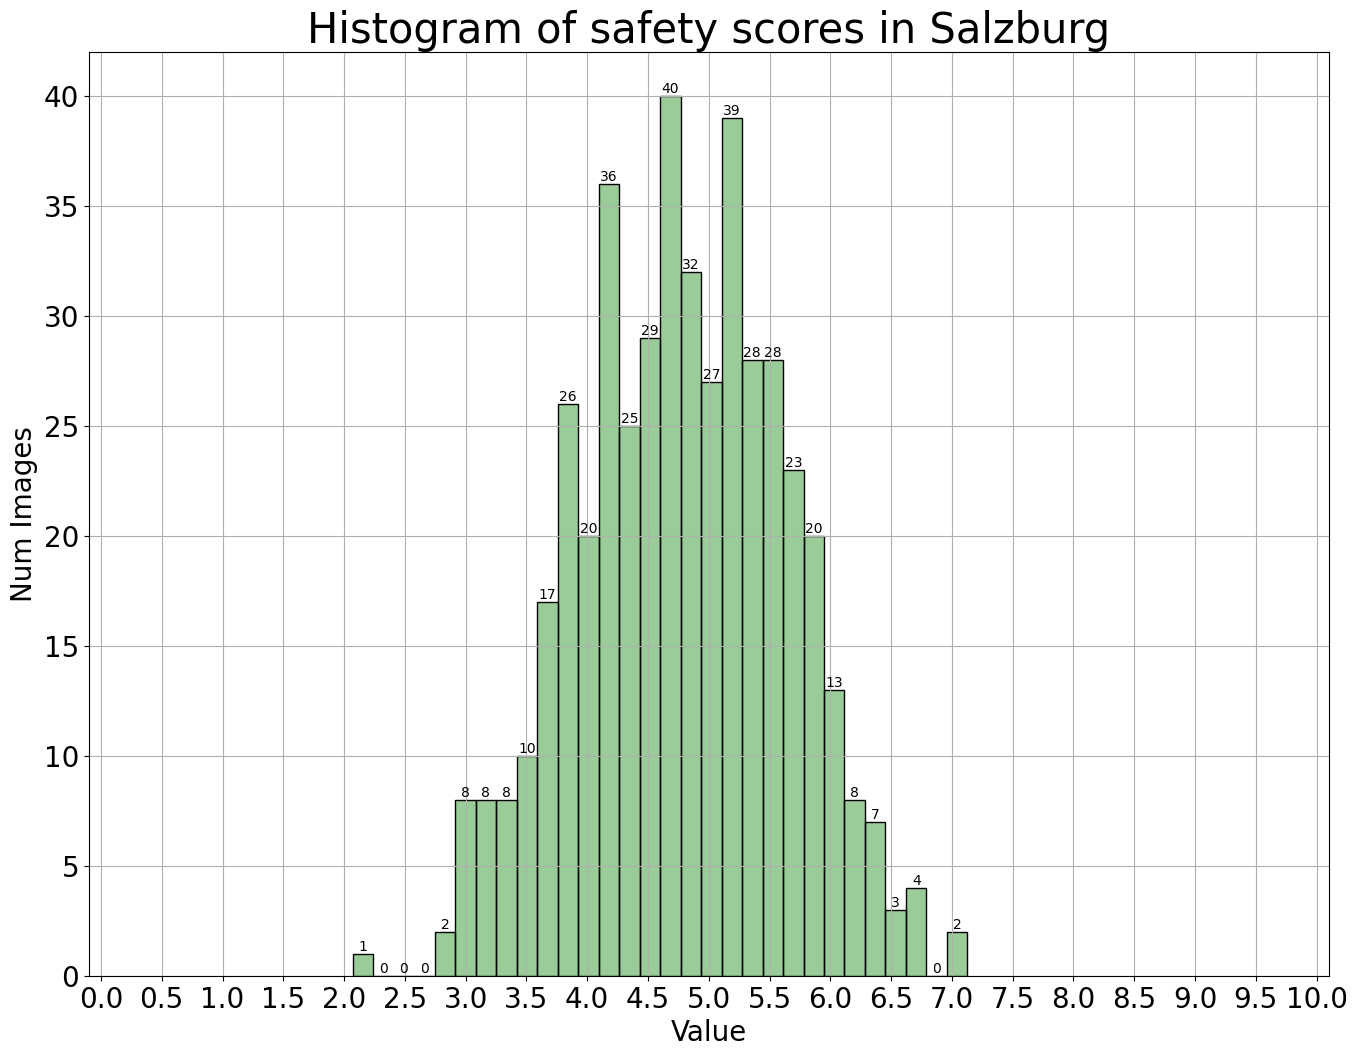

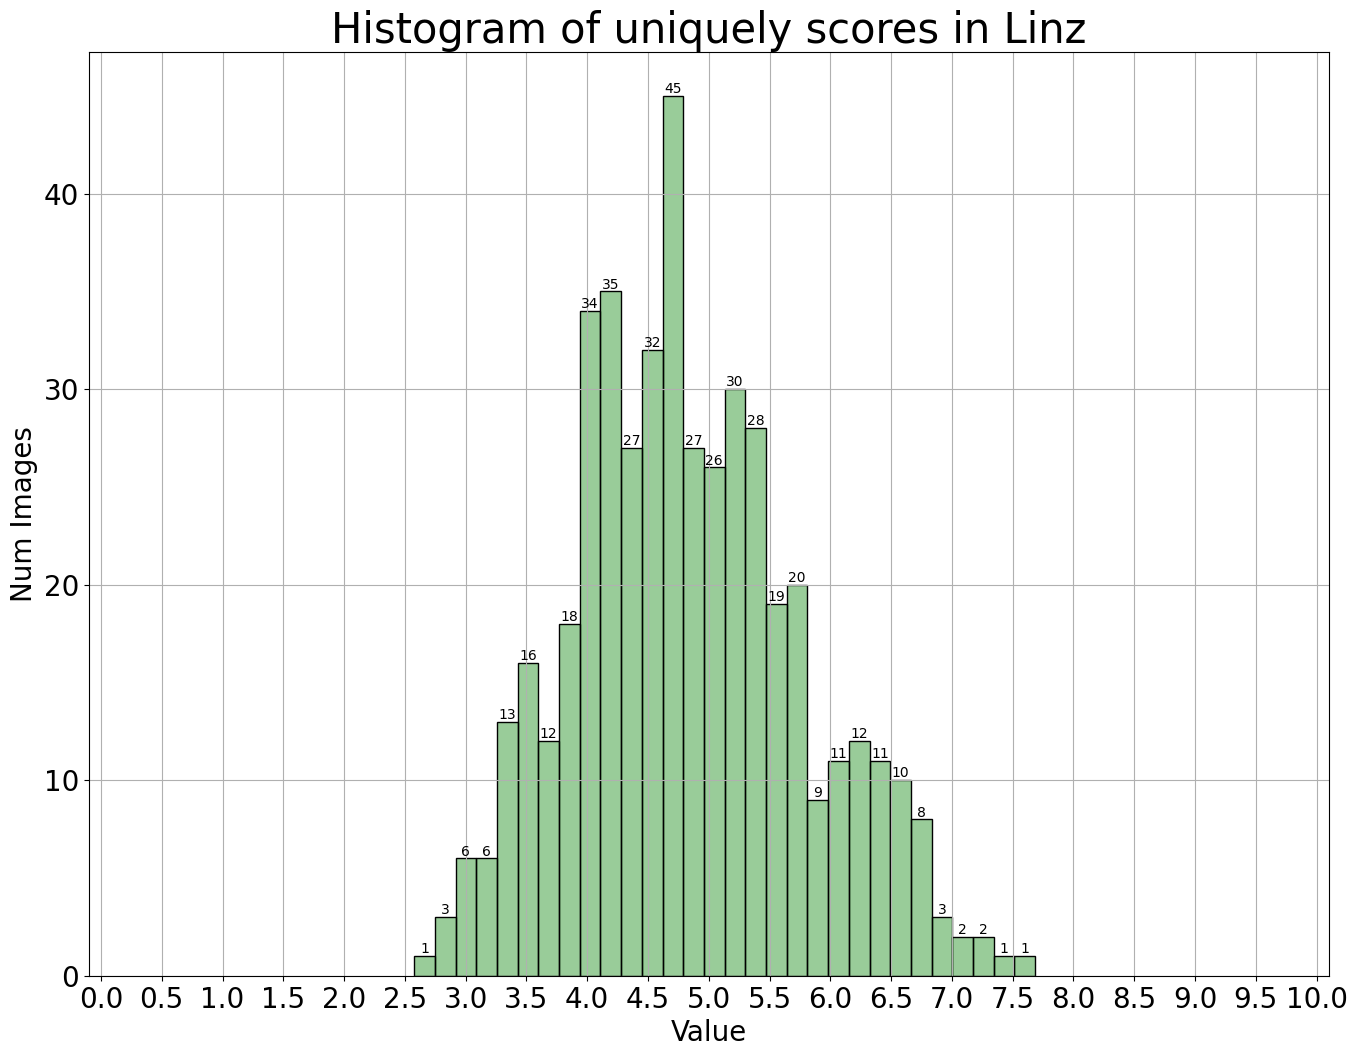

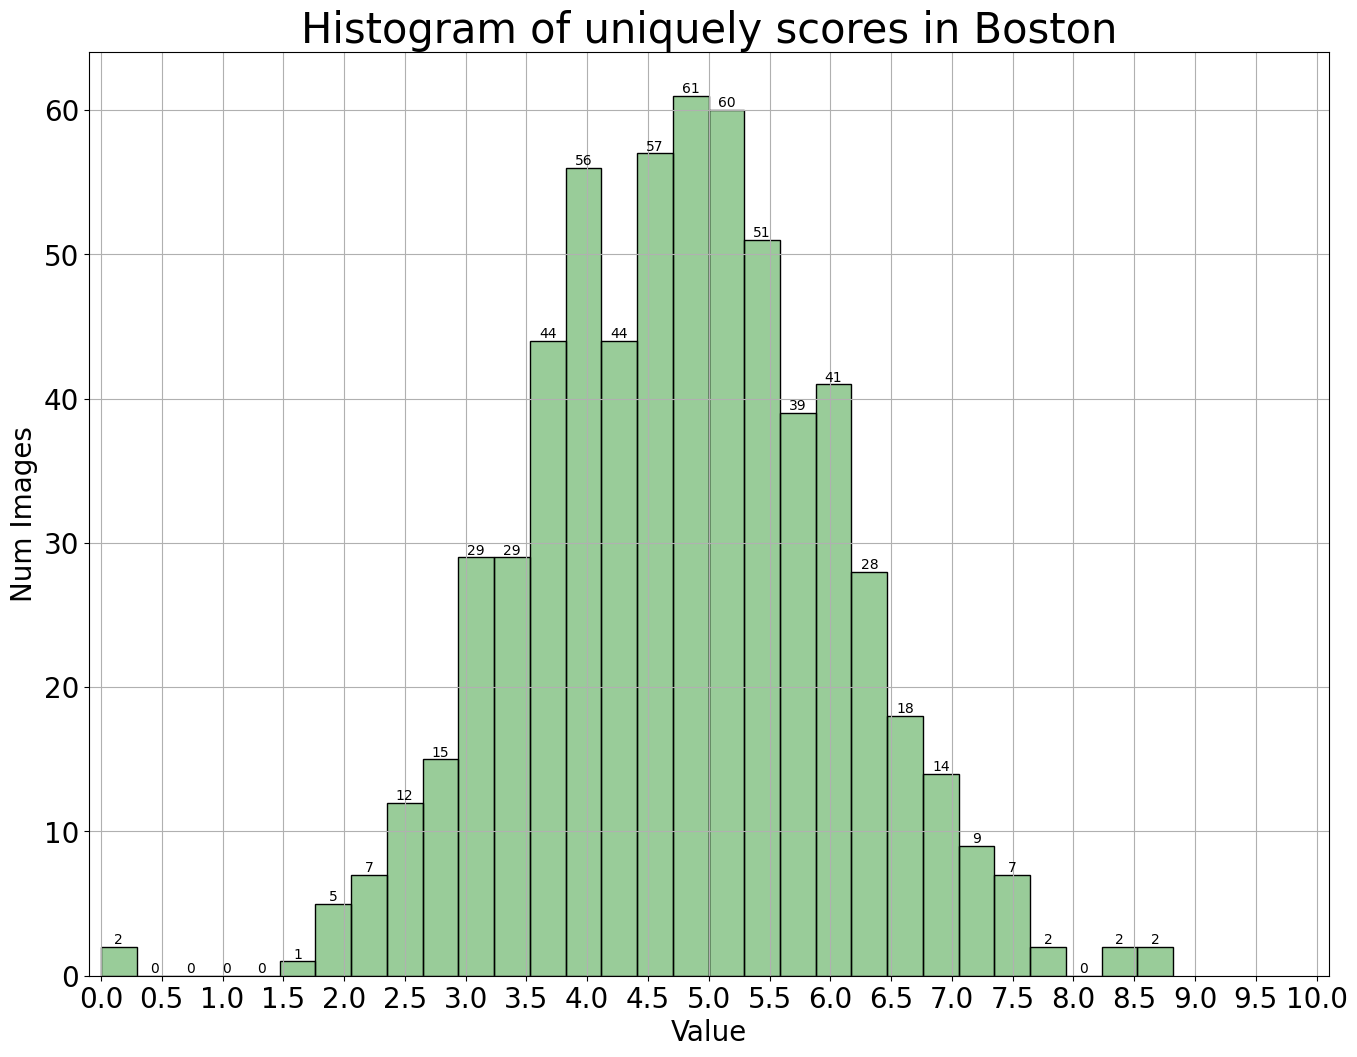

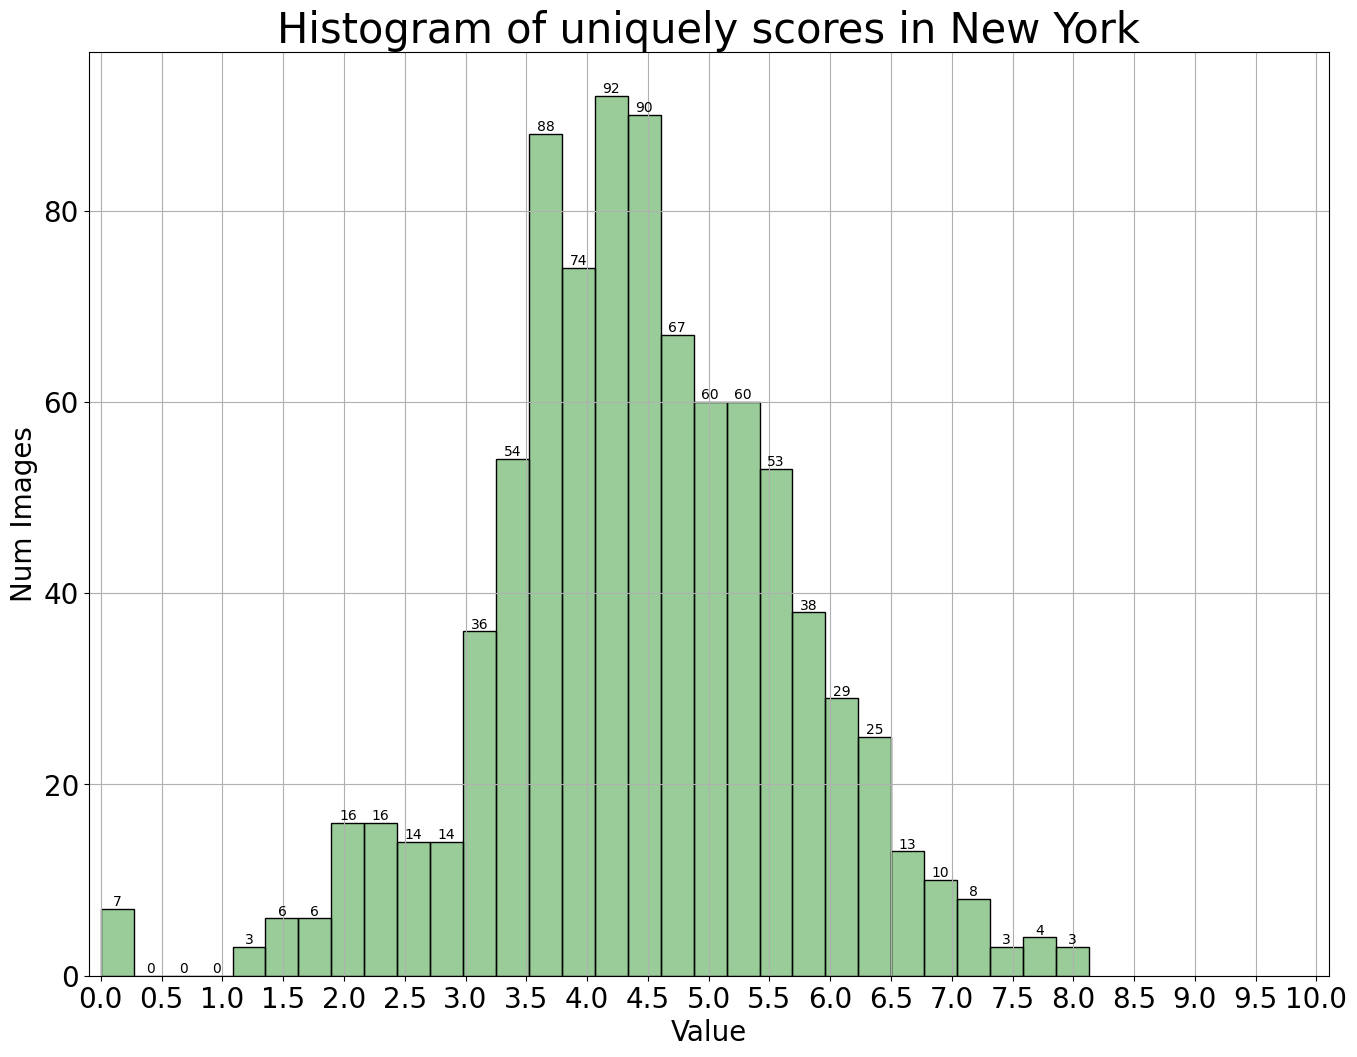

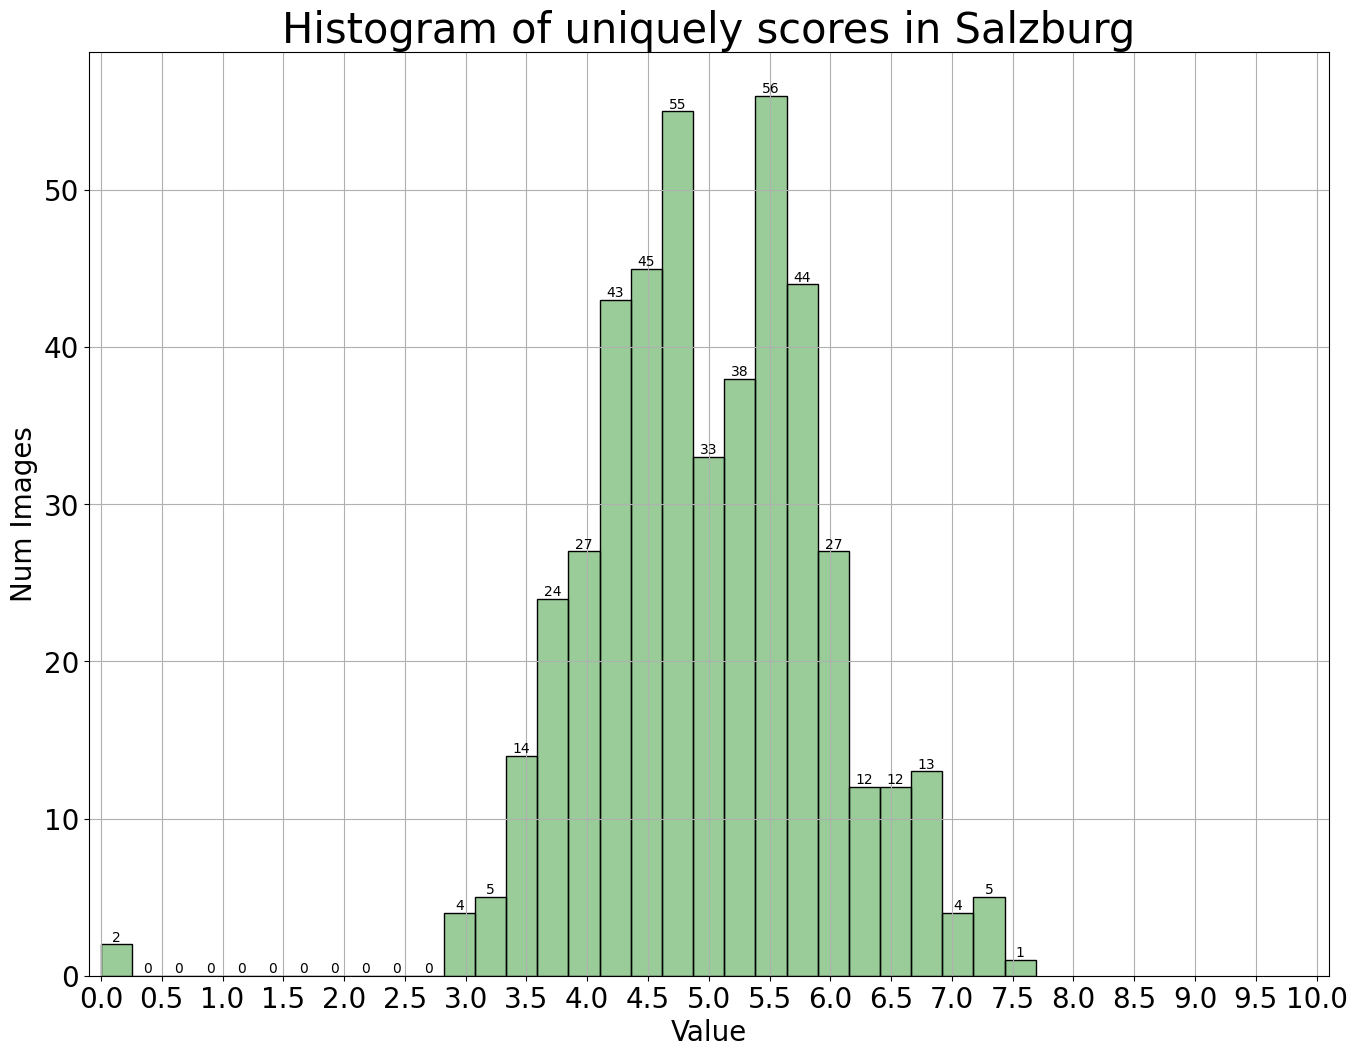

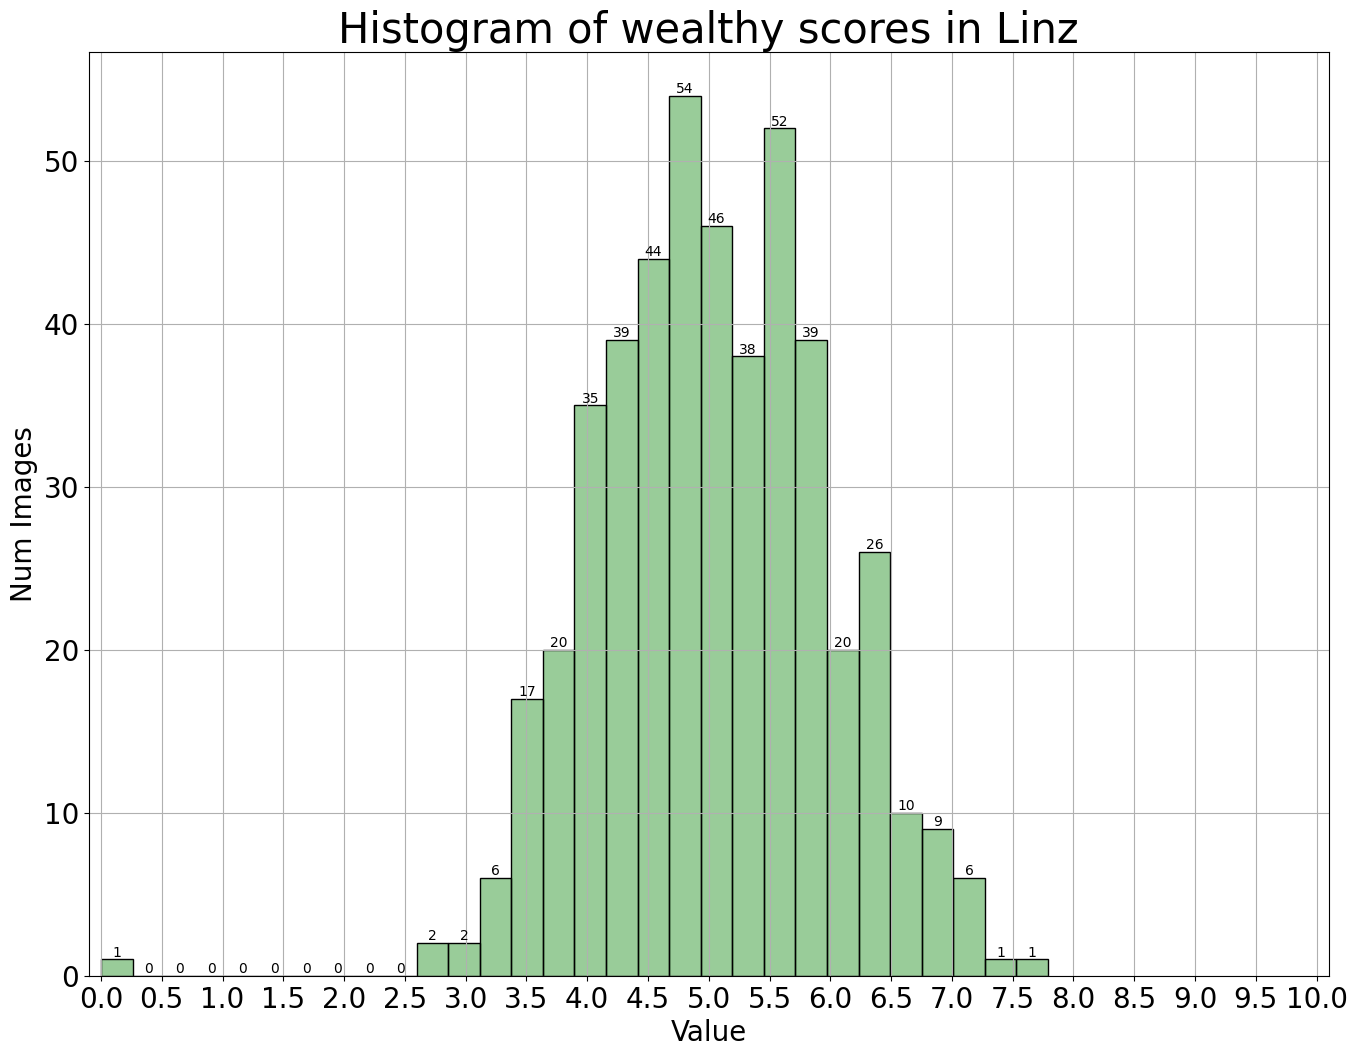

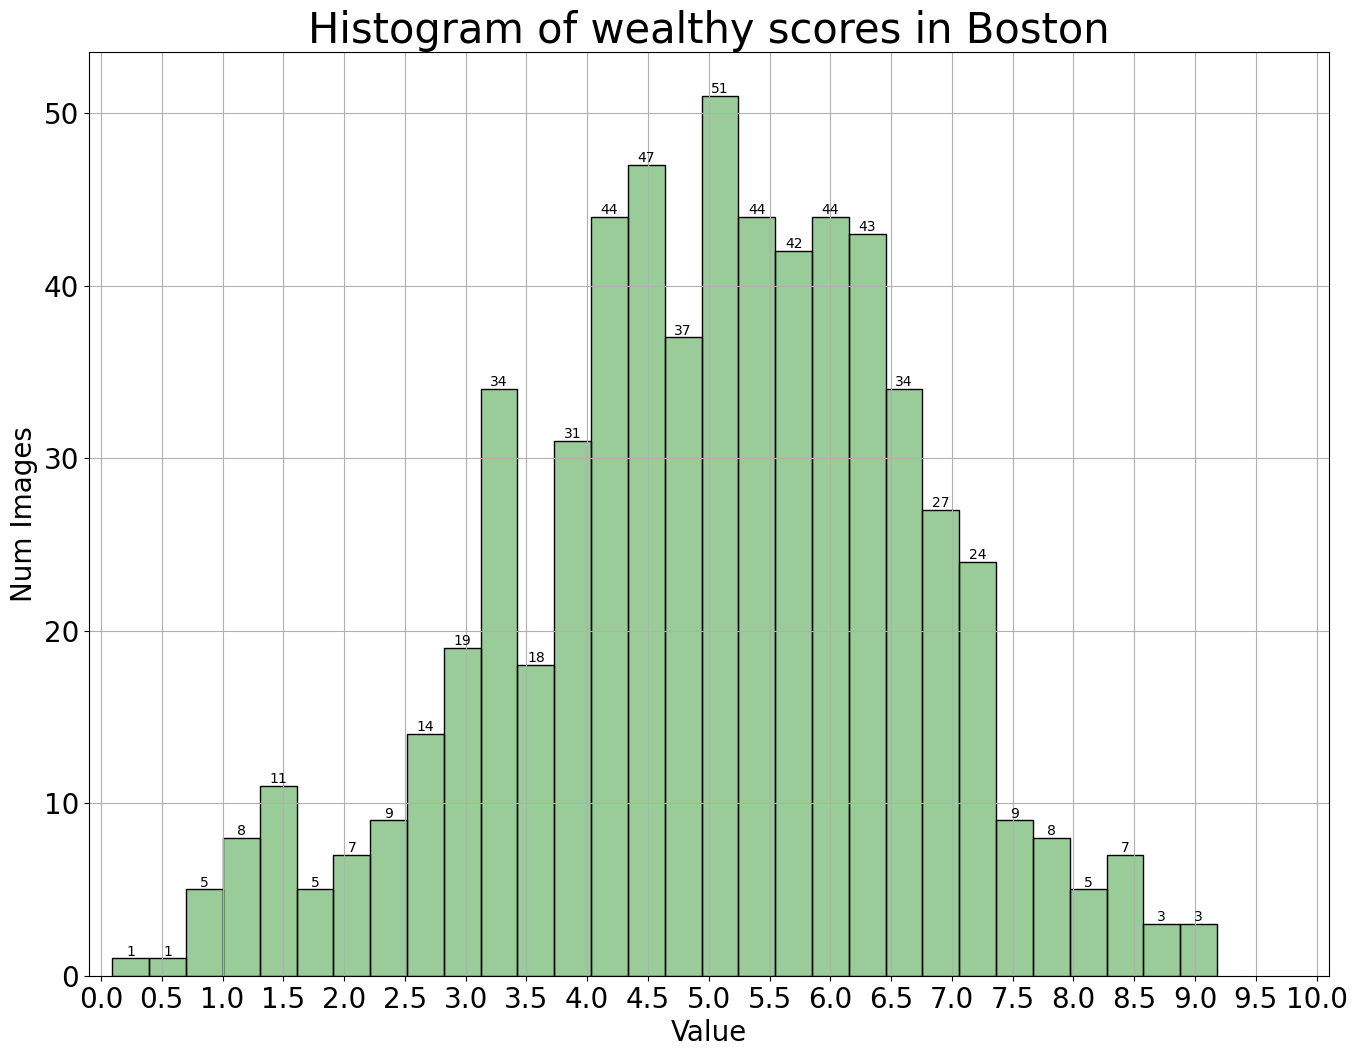

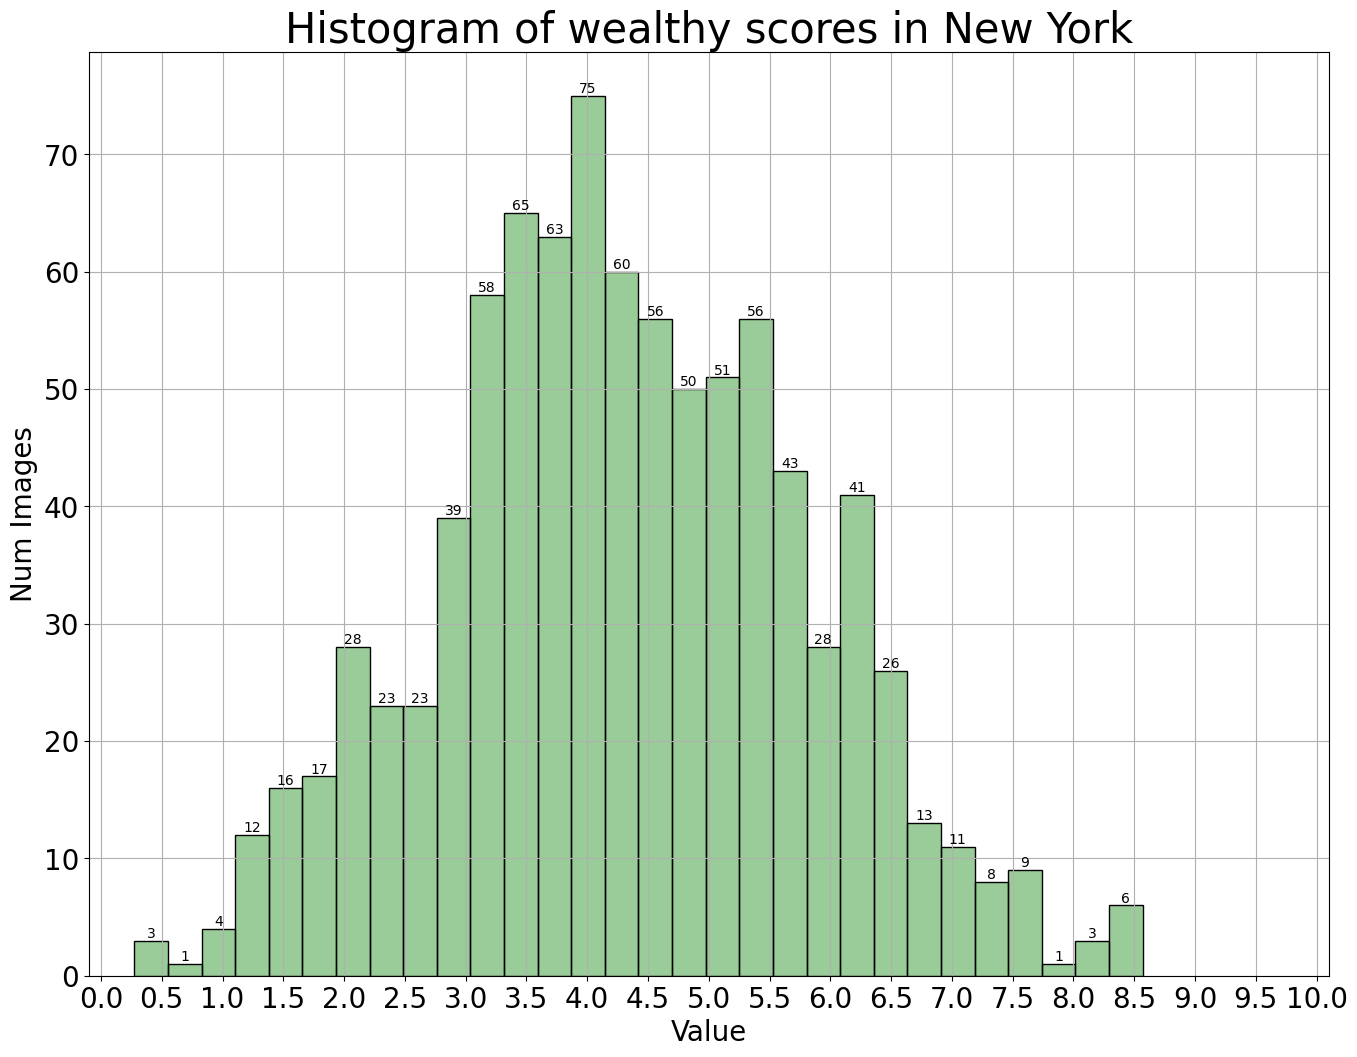

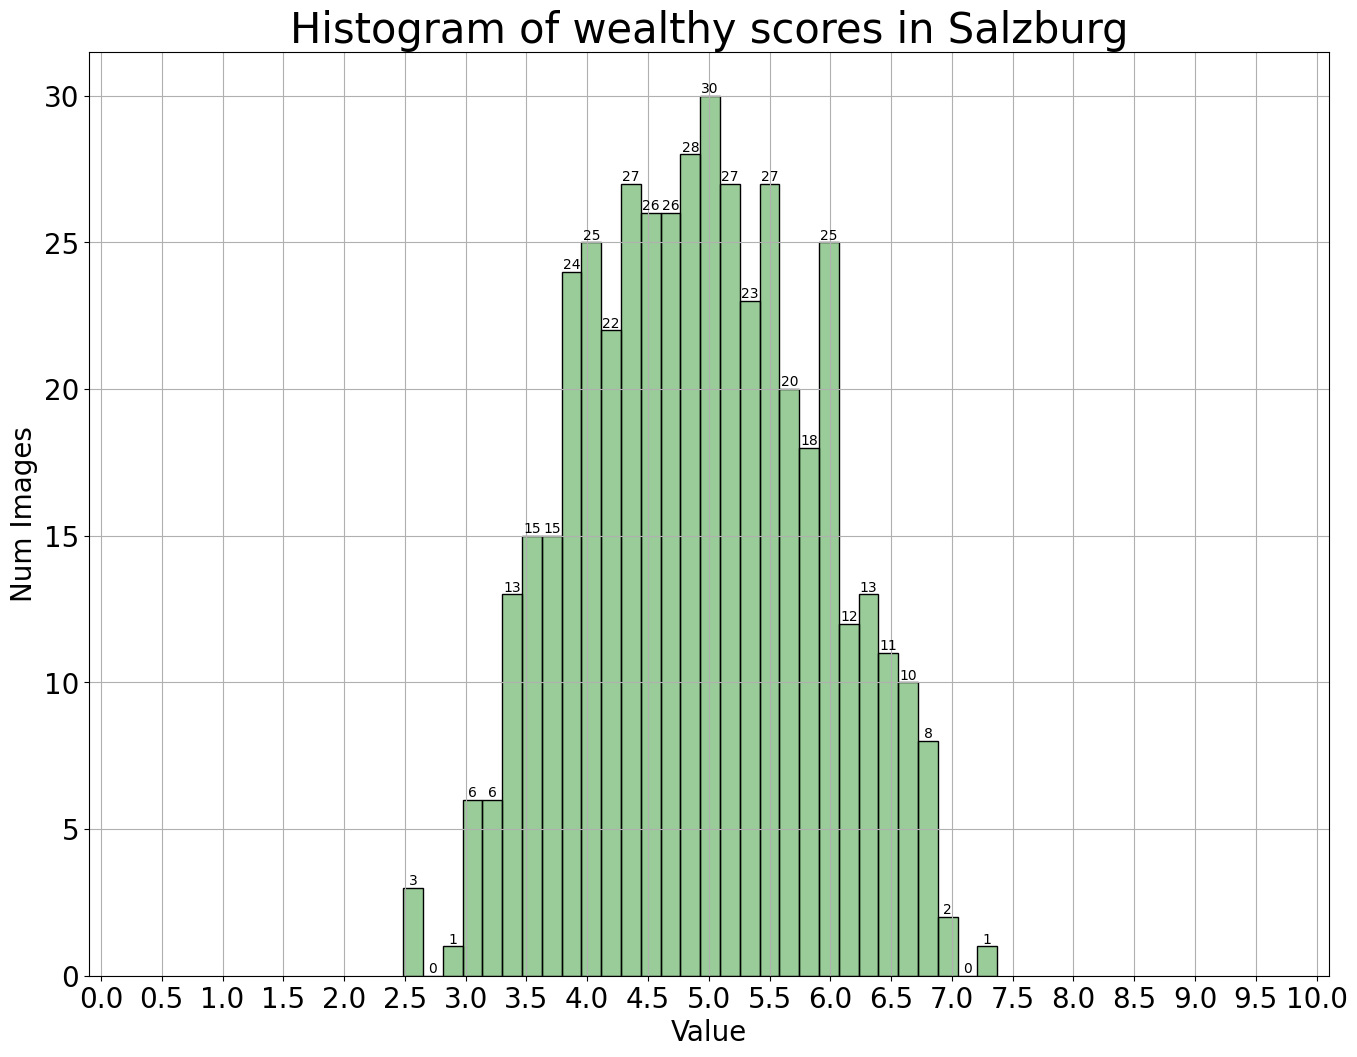

In [19]:
for metric in metrics:
    # verifyDir(f"{IMAGES_PATH}{metric}/cities/")
    # verifyDir(f"{RESULTS_PATH}{metric}/cities/")
    
    for current_city in data_df["city"].unique().tolist():
        city_df = data_df[data_df["city"]==current_city].copy()
        
        scores = city_df[metric].values
        
        fig, ax = plt.subplots(figsize=(16,12), nrows=1, ncols=1, sharex=False, sharey=False)

        sns_fig = sns.histplot(scores, 
                                 bins=30, 
                                 color='g', 
                                 kde=False, 
                                 label='City', 
                                 ax=ax,
                                 alpha=0.4)

        sns_fig.set_title(f"Histogram of {metric} scores in {current_city}", fontsize=30)
        sns_fig.set_ylabel('Num Images', fontsize=20)
        sns_fig.set_xlabel('Value', fontsize=20)

        # rotate the axis ticklabels
        _ = sns_fig.tick_params(axis='x', rotation=0, labelsize=20)

        # rotate the axis ticklabels
        _ = sns_fig.tick_params(axis='y', labelsize=20)

        # add annotation
        _ = sns_fig.bar_label(sns_fig.containers[0], fmt='%0.0f', fontsize=10,rotation=0)

        # add a space on y for the annotations
        #sns_fig.margins(x=0.1)
        ax.grid(True)

        # plt.xlim(-0.1, 10.1)
        # plt.xticks(np.arange(0.0, 10.1, 0.5))

        # ax.legend(fontsize=40)
        # a,b = ax.get_xlim()
        xticks = np.arange(0.0, 10.1, 0.5)  # Adjust the range and step as needed
        sns_fig.set_xticks(xticks)
        ax.set_xlim(-0.1, 10.1)

        # # Display the plot
        # plt.legend()

        # fig.savefig(f'{IMAGES_PATH}/{metric}/cities/{current_city}_score_histogram.png')
        plt.show()
        plt.close(fig)